In [1]:
## 공유된 코드(실행 확인)

import pandas as pd

# GCS 파일 경로
gcs_path = "gs://codeit-project/votes/accounts_timelinereport.parquet"
# 예시: gs://codeit-project/hackle/hackle_events.parquet

# GCP 키 경로
key_path = "config/key.json"

# 데이터 불러오기
df = pd.read_parquet(gcs_path, storage_options={"token": key_path})

# 확인
df.head()



,id,reason,created_at,reported_user_id,user_id,user_question_record_id
0,28,타인을 사칭함,2023-05-06 04:44:57,874587,885082,3920588
1,37,친구를 비하하거나 조롱하는 어투,2023-05-06 05:41:19,881048,881298,4018679
2,46,친구를 비하하거나 조롱하는 어투,2023-05-06 06:26:59,887882,881945,4120914
3,64,허위 사실 언급,2023-05-06 07:07:46,888610,893684,4143049
4,65,허위 사실 언급,2023-05-06 07:07:52,888610,893684,4143049


# Votes 데이터 가져오기
---
---

## 간단한 EDA 및 데이터 한번에 가져오는 방법 모색

In [2]:
# 필요 라이브러리 정리 
import pandas as pd

# GCS 파일 경로에서 데이터 불러오기 위한 라이브러리
from google.cloud import storage
from google.oauth2 import service_account

# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import matplotlib.dates as mdates

In [3]:
# 인증
key_path = "config/key.json"
credentials = service_account.Credentials.from_service_account_file(key_path)

# GCS 클라이언트 생성
client = storage.Client(credentials=credentials)
bucket = client.bucket("codeit-project")

# 'votes/' 경로에 있는 .parquet 파일 리스트 가져오기
blobs = bucket.list_blobs(prefix="votes/")
vote_file_list = [f"gs://codeit-project/{blob.name}" for blob in blobs if blob.name.endswith(".parquet")]

# 결과 확인
vote_file_list


['gs://codeit-project/votes/accounts_attendance.parquet',
 'gs://codeit-project/votes/accounts_blockrecord.parquet',
 'gs://codeit-project/votes/accounts_failpaymenthistory.parquet',
 'gs://codeit-project/votes/accounts_friendrequest.parquet',
 'gs://codeit-project/votes/accounts_group.parquet',
 'gs://codeit-project/votes/accounts_nearbyschool.parquet',
 'gs://codeit-project/votes/accounts_paymenthistory.parquet',
 'gs://codeit-project/votes/accounts_pointhistory.parquet',
 'gs://codeit-project/votes/accounts_school.parquet',
 'gs://codeit-project/votes/accounts_timelinereport.parquet',
 'gs://codeit-project/votes/accounts_user.parquet',
 'gs://codeit-project/votes/accounts_user_contacts.parquet',
 'gs://codeit-project/votes/accounts_userquestionrecord.parquet',
 'gs://codeit-project/votes/accounts_userwithdraw.parquet',
 'gs://codeit-project/votes/event_receipts.parquet',
 'gs://codeit-project/votes/events.parquet',
 'gs://codeit-project/votes/polls_question.parquet',
 'gs://codeit-p

In [4]:
# 파일 이름 추출 방법 모색

for title in vote_file_list:
    # GCS 파일 경로
    gcs_path = title

    # GCP 키 경로
    key_path = "config/key.json"
    
    # 파일 이름 추출
    file_name = title.split('/')[-1].replace('.parquet', '')
    
    # 확인
    print(f"{file_name}")

accounts_attendance
accounts_blockrecord
accounts_failpaymenthistory
accounts_friendrequest
accounts_group
accounts_nearbyschool
accounts_paymenthistory
accounts_pointhistory
accounts_school
accounts_timelinereport
accounts_user
accounts_user_contacts
accounts_userquestionrecord
accounts_userwithdraw
event_receipts
events
polls_question
polls_questionpiece
polls_questionreport
polls_questionset
polls_usercandidate


In [5]:
# 결과 저장용 딕셔너리
df_dict = {}

# GCP 키 경로
key_path = "config/key.json"

for title in vote_file_list:
    gcs_path = title
    df_file_name = title.split('/')[-1].replace('.parquet', '')
    
    # 데이터 불러오기
    df = pd.read_parquet(gcs_path, storage_options={"token": key_path})
    
    # 딕셔너리에 저장
    df_dict[df_file_name] = df

    # 출력
    print(f"{df_file_name} 데이터 프레임 확인")
    print("="*50)
    print(df.head())
    print(f"{df_file_name} 데이터 프레임 크기 : {df.shape}")
    print()
    print(f"{df_file_name} 기본 정보 확인")
    df.info()
    print("\n" + "-"*70 + "\n")


accounts_attendance 데이터 프레임 확인
   id                               attendance_date_list  user_id
0   1  ["2023-05-27", "2023-05-28", "2023-05-29", "20...  1446852
1   2  ["2023-05-27", "2023-05-29", "2023-05-30", "20...  1359398
2   3  ["2023-05-27", "2023-05-29", "2023-05-30", "20...  1501542
3   4  ["2023-05-27", "2023-05-28", "2023-05-29", "20...  1507767
4   5  ["2023-05-27", "2023-05-28", "2023-05-29", "20...  1287453
accounts_attendance 데이터 프레임 크기 : (349637, 3)

accounts_attendance 기본 정보 확인
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349637 entries, 0 to 349636
Data columns (total 3 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    349637 non-null  int64 
 1   attendance_date_list  349637 non-null  object
 2   user_id               349637 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 8.0+ MB

----------------------------------------------------------------------

accounts_b

In [6]:
# 예시로 특정 데이터 프레임 확인

df_dict["polls_usercandidate"].head()

,id,created_at,question_piece_id,user_id
0,3088872,2023-04-28 12:27:49,998458,849444
1,3088873,2023-04-28 12:27:49,998458,849454
2,3088874,2023-04-28 12:27:49,998458,849460
3,3088875,2023-04-28 12:27:49,998458,849469
4,3088964,2023-04-28 12:28:02,998459,849446


In [7]:
# 각 DataFrame의 메모리 사용량 계산 (MB 단위)
memory_info = {
    name: df.memory_usage(deep=True).sum() / (1024**2)  # MB 단위
    for name, df in df_dict.items()
}

# 크기 순으로 정렬
sorted_memory = sorted(memory_info.items(), key=lambda x: x[1], reverse=True)

# 출력
print("데이터프레임 메모리 사용량 (MB):")
for name, size in sorted_memory:
    print(f"{name:30s} : {size:.2f} MB")


데이터프레임 메모리 사용량 (MB):
accounts_friendrequest         : 1602.58 MB
accounts_user                  : 550.32 MB
accounts_userquestionrecord    : 227.59 MB
polls_usercandidate            : 145.56 MB
accounts_pointhistory          : 89.22 MB
accounts_attendance            : 54.05 MB
polls_questionpiece            : 48.27 MB
polls_questionset              : 37.53 MB
accounts_paymenthistory        : 13.45 MB
accounts_userwithdraw          : 7.66 MB
polls_questionreport           : 6.50 MB
accounts_group                 : 2.58 MB
accounts_blockrecord           : 2.45 MB
accounts_nearbyschool          : 1.82 MB
accounts_school                : 0.98 MB
polls_question                 : 0.65 MB
accounts_user_contacts         : 0.41 MB
accounts_timelinereport        : 0.03 MB
accounts_failpaymenthistory    : 0.02 MB
event_receipts                 : 0.01 MB
events                         : 0.00 MB


## 각 데이터 살펴보기 (다른 테이블과 merge 하지 않고 확인)
데이터 크기가 작은 순서대로 진행

---
---

In [8]:
# ## 공통으로 진행할 내용

# def check_data_info(df):
    
#     # 각 데이터프레임에서 데이터 타입 확인
#     print("데이터 타입 확인")
#     print("="*50)
#     print(df.dtypes)
    
#     # 결측치 확인
#     print("결측치 확인")
#     print("="*50)
#     print(df.isnull().sum())
#     print("결측치 비율 확인")
#     print("="*50)
#     print(df.isnull().mean() * 100)
    
#     # id 컬럼이 있는 경우 id 컬럼 제외한 중복값 확인
#     if 'id' in df.columns:
#         print("id 컬럼 제외한 중복값 확인")
#         print("="*50)
#         print(df.drop(columns=['id']).duplicated().sum())
#         print("id 컬럼 제외한 중복값 비율 확인")
#         print("="*50)
#         print(df.drop(columns=['id']).duplicated().mean() * 100)
#     # id 컬럼이 없는 경우
#     else:
#         print("id 컬럼이 없습니다. 전체 중복값 확인")
#         print("="*50)
#         print(df.duplicated().sum())
#         print("전체 중복값 비율 확인")
#         print("="*50)
#         print(df.duplicated().mean() * 100)
    
#     # 데이터프레임 크기 확인
#     print("데이터프레임 크기 확인")
#     print("="*50)
#     print(df.shape)
#     print("데이터프레임 메모리 사용량 확인")
#     print("="*50)
#     print(df.memory_usage(deep=True).sum() / (1024**2), "MB")
    
#     # 데이터프레임의 기본 통계량 확인
#     print("기본 통계량 확인")
#     print("="*50)
#     print(df.describe(include='all'))
    
#     return df
    

In [9]:
# 공통으로 데이터 확인을 위한 함수 처리(좀 더 구체적으로 함수 제작)

def check_data_info(df, verbose=True):
    result = {}

    # 데이터 타입
    if verbose: print("데이터 타입 확인\n" + "="*50)
    result['dtypes'] = df.dtypes

    # 결측치 개수 및 비율
    null_count = df.isnull().sum()
    null_rate = round(df.isnull().mean() * 100,3)

    result['null_count'] = null_count
    result['null_rate'] = null_rate

    if verbose and null_count.sum() > 0:
        print("결측치 확인\n" + "="*50)
        print(null_count[null_count > 0])  # 결측치 있는 컬럼만 출력
        print("결측치 비율 확인\n" + "="*50)
        print(null_rate[null_rate > 0])
    else:
        print("결측치가 없습니다.\n" + "="*50)

    # 중복 체크
    if 'id' in df.columns:
        dup_count = df.drop(columns=['id']).duplicated().sum()
        dup_rate = round(df.drop(columns=['id']).duplicated().mean() * 100,3)
        result['duplicate_excl_id'] = {'count': dup_count, 'rate': dup_rate}
        if verbose and dup_count > 0:
            print("id 컬럼 제외한 중복값 확인\n" + "="*50)
            print(dup_count)
            print("비율\n" + "="*50)
            print(dup_rate)
        else:
            print("id 컬럼 제외한 중복값이 없습니다.\n" + "="*50)
            
    
    dup_count = df.duplicated().sum()
    dup_rate = round(df.duplicated().mean() * 100,3)
    result['duplicate_all'] = {'count': dup_count, 'rate': dup_rate}
    if verbose and dup_count > 0:
        print("전체 중복값 확인\n" + "="*50)
        print(dup_count)
        print("비율\n" + "="*50)
        print(dup_rate)
    else:
        print("전체 중복값이 없습니다.\n" + "="*50)

    # 크기 및 메모리
    result['shape'] = df.shape
    result['memory_MB'] = df.memory_usage(deep=True).sum() / 1024**2
    if verbose:
        print("데이터프레임 크기 확인\n" + "="*50)
        print(result['shape'])
        print("메모리 사용량\n" + "="*50)
        print(f"{result['memory_MB']:.2f} MB")

    # 통계 요약
    result['describe'] = df.describe(include='all')
    if verbose:
        print("기본 통계량\n" + "="*50)
        print(result['describe'])

    # 데이터 일부분 확인
    display(df.head())

    return result

### 데이터 공통으로 살펴보면 좋을 내용 함수 및 dict 저장 및 시각화

- 데이터별 기간의 차이 확인
- 유저의 수 확인
- 각 데이터가 가진 유저 dict으로 저장

In [10]:
# # 데이터의 기간 확인 + 유저의 유니크한 수 확인 + 유니크한 유저를 하나의 dict 또는 class로 저장

df_user_dict = {}

def check_period_and_unique_users(df, title):
    start_date, end_date, unique_users = None, None, None  # 기본값
    if 'created_at' in df.columns:
        start_date = df['created_at'].min()
        end_date = df['created_at'].max()
        print(f"[{title}] 데이터 기간: {start_date} ~ {end_date}")
    else:
        print(f"[{title}] created_at 컬럼이 없습니다.")

    if 'user_id' in df.columns:
        unique_users = df['user_id'].nunique()
        print(f"[{title}] 유니크한 유저 수: {unique_users}")
        df_user_dict[title] = set(df['user_id'].dropna())
    else:
        print(f"[{title}] user_id 컬럼이 없습니다.")
        unique_users = None

    return start_date, end_date, unique_users

In [11]:
df_user_summary = {}

for title, df in df_dict.items():
    start, end, unique_user = check_period_and_unique_users(df, title)
    df_user_summary[title] = {
        "start_date": start,
        "end_date": end,
        "unique_user_count": unique_user,
        "user_ids": df_user_dict.get(title, set())
    }


[accounts_attendance] created_at 컬럼이 없습니다.
[accounts_attendance] 유니크한 유저 수: 349637
[accounts_blockrecord] 데이터 기간: 2023-05-04 23:01:53 ~ 2024-05-06 13:03:37
[accounts_blockrecord] 유니크한 유저 수: 12552
[accounts_failpaymenthistory] 데이터 기간: 2023-05-14 05:49:22 ~ 2023-09-17 09:12:53
[accounts_failpaymenthistory] 유니크한 유저 수: 160
[accounts_friendrequest] 데이터 기간: 2023-04-17 18:29:11 ~ 2024-05-09 09:21:47
[accounts_friendrequest] user_id 컬럼이 없습니다.
[accounts_group] created_at 컬럼이 없습니다.
[accounts_group] user_id 컬럼이 없습니다.
[accounts_nearbyschool] created_at 컬럼이 없습니다.
[accounts_nearbyschool] user_id 컬럼이 없습니다.
[accounts_paymenthistory] 데이터 기간: 2023-05-13 21:28:34 ~ 2024-05-08 14:12:45
[accounts_paymenthistory] 유니크한 유저 수: 59192
[accounts_pointhistory] 데이터 기간: 2023-04-28 12:27:49 ~ 2024-05-08 01:36:18
[accounts_pointhistory] 유니크한 유저 수: 5037
[accounts_school] created_at 컬럼이 없습니다.
[accounts_school] user_id 컬럼이 없습니다.
[accounts_timelinereport] 데이터 기간: 2023-05-06 04:44:57 ~ 2023-06-02 08:30:06
[accounts_timelin

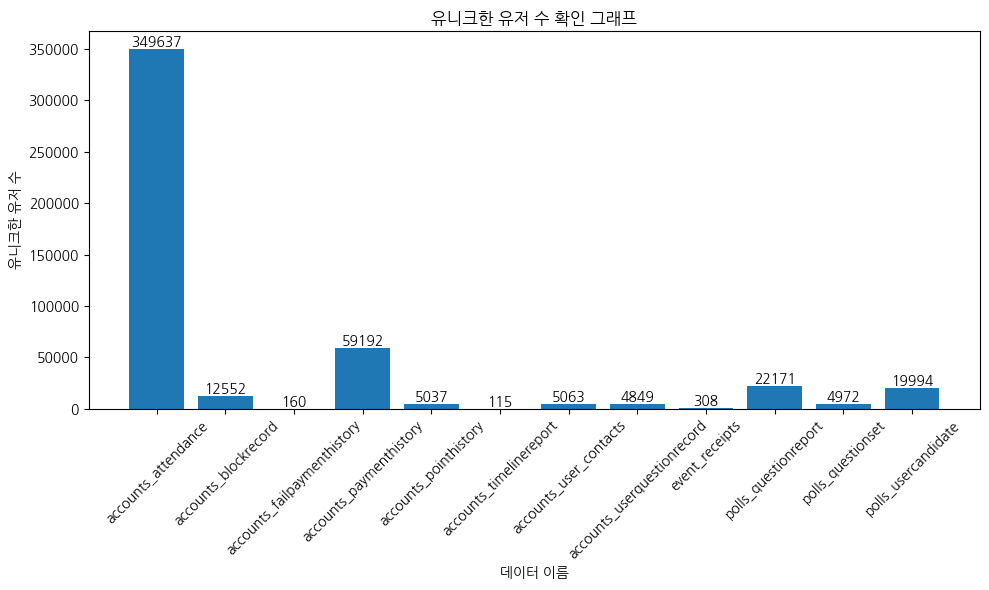

In [12]:
# user_id가 있는 경우만 필터링
valid_user_summary = {
    title: info for title, info in df_user_summary.items()
    if info.get("unique_user_count") is not None
}

# 파일 이름과 유저 수 추출
titles = list(valid_user_summary.keys())
user_counts = [valid_user_summary[title]["unique_user_count"] for title in titles]

# 시각화(위에 해당 유저 수 표시)
plt.figure(figsize=(10, 6))
plt.bar(titles, user_counts)
plt.title("유니크한 유저 수 확인 그래프")
plt.xlabel("데이터 이름")
plt.ylabel("유니크한 유저 수")
for i, count in enumerate(user_counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


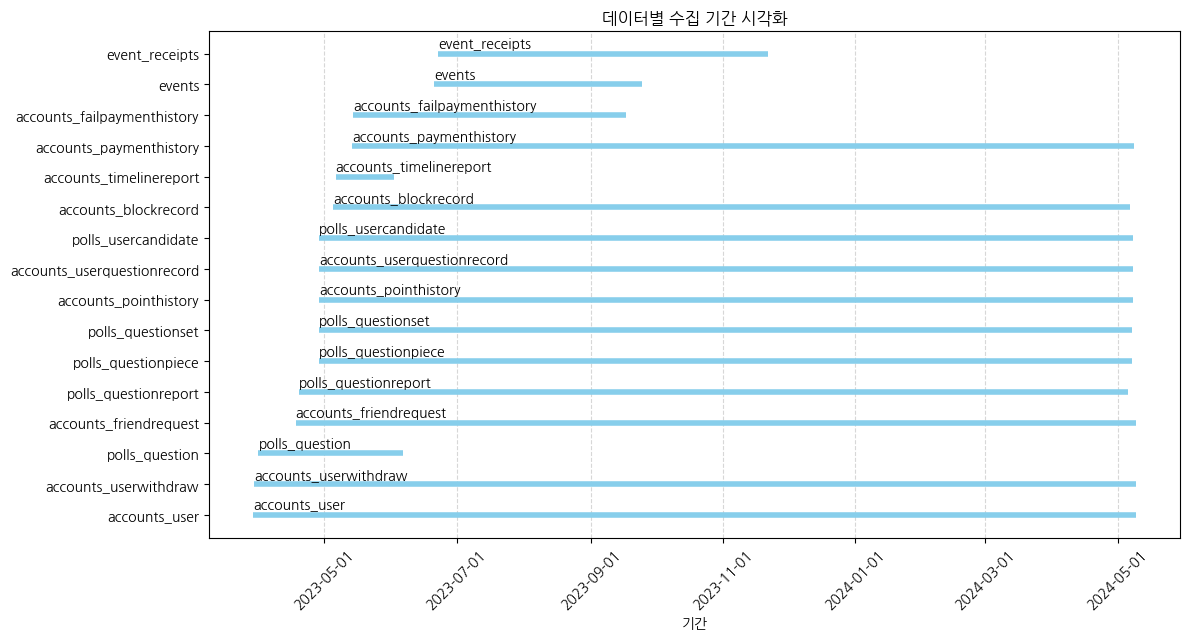

In [13]:
# 기간 정보가 있는 테이블만 사용
df_plot = pd.DataFrame([
    {
        "title": title,
        "start": info["start_date"],
        "end": info["end_date"]
    }
    for title, info in df_user_summary.items()
    if info.get("start_date") and info.get("end_date")
])

# y축: 테이블 이름을 index로 변환
df_plot = df_plot.sort_values("start").reset_index(drop=True)

plt.figure(figsize=(12, 6))

for idx, row in df_plot.iterrows():
    plt.hlines(
        y=idx, xmin=row["start"], xmax=row["end"],
        color='skyblue', linewidth=4
    )
    plt.text(row["start"], idx + 0.1, row["title"], fontsize=10, va='bottom')

# x축 날짜 포맷 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

# y축 눈금 설정
plt.yticks(range(len(df_plot)), df_plot["title"])
plt.xlabel("기간")
plt.title("데이터별 수집 기간 시각화")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


## events 
---
---
### 공통 확인 부분

In [14]:
check_data_info(df_dict["events"])

데이터 타입 확인
결측치가 없습니다.
id 컬럼 제외한 중복값이 없습니다.
전체 중복값이 없습니다.
데이터프레임 크기 확인
(3, 6)
메모리 사용량
0.00 MB
기본 통계량
         id          title   plus_point event_type  is_expired  \
count   3.0              3     3.000000          3         3.0   
unique  NaN              3          NaN          1         NaN   
top     NaN  코드잇 은행 가입 이벤트          NaN       FCFS         NaN   
freq    NaN              1          NaN          3         NaN   
mean    2.0            NaN   666.666667        NaN         1.0   
min     1.0            NaN   500.000000        NaN         1.0   
25%     1.5            NaN   500.000000        NaN         1.0   
50%     2.0            NaN   500.000000        NaN         1.0   
75%     2.5            NaN   750.000000        NaN         1.0   
max     3.0            NaN  1000.000000        NaN         1.0   
std     1.0            NaN   288.675135        NaN         0.0   

                           created_at  
count                               3  
unique                      

,id,title,plus_point,event_type,is_expired,created_at
0,1,코드잇 은행 가입 이벤트,500,FCFS,1,2023-06-20 11:56:38
1,2,코드잇 멤버십 가입 이벤트,1000,FCFS,1,2023-08-08 07:43:45
2,3,예고 영상 기대평 이벤트,500,FCFS,1,2023-09-24 17:05:59


{'dtypes': id                     int64
 title                 object
 plus_point             int64
 event_type            object
 is_expired             int64
 created_at    datetime64[ns]
 dtype: object,
 'null_count': id            0
 title         0
 plus_point    0
 event_type    0
 is_expired    0
 created_at    0
 dtype: int64,
 'null_rate': id            0.0
 title         0.0
 plus_point    0.0
 event_type    0.0
 is_expired    0.0
 created_at    0.0
 dtype: float64,
 'duplicate_excl_id': {'count': np.int64(0), 'rate': np.float64(0.0)},
 'duplicate_all': {'count': np.int64(0), 'rate': np.float64(0.0)},
 'shape': (3, 6),
 'memory_MB': np.float64(0.0008029937744140625),
 'describe':          id          title   plus_point event_type  is_expired  \
 count   3.0              3     3.000000          3         3.0   
 unique  NaN              3          NaN          1         NaN   
 top     NaN  코드잇 은행 가입 이벤트          NaN       FCFS         NaN   
 freq    NaN              1       

### EDA
---

In [15]:
# id 컬럼을 event_id로 변경이 필요
df_dict["events"].rename(columns={"id": "event_id"}, inplace=True)

# id 컬럼을 event_id로 변경한 후 데이터 일부 확인
display(df_dict["events"].head())

,event_id,title,plus_point,event_type,is_expired,created_at
0,1,코드잇 은행 가입 이벤트,500,FCFS,1,2023-06-20 11:56:38
1,2,코드잇 멤버십 가입 이벤트,1000,FCFS,1,2023-08-08 07:43:45
2,3,예고 영상 기대평 이벤트,500,FCFS,1,2023-09-24 17:05:59


### 기타 아이디어 및 내용 정리
---

- 별다른 특이점이 보이진 않고 id를 event_id로 변경 필요함
- 이벤트가 얼마나 오래 지속되었는지 확인할 방법은 없어서 다른 테이블에서 유추(event_receipt)필요
    - 기간별로 event 참여가 얼마나 차이가 있는지
    - 포인트별로 event 참여가 얼마나 차이가 잇는지지

## events_receipts
---
---
### 공통 확인 부분

In [16]:
check_data_info(df_dict["event_receipts"])

데이터 타입 확인
결측치가 없습니다.
id 컬럼 제외한 중복값이 없습니다.
전체 중복값이 없습니다.
데이터프레임 크기 확인
(309, 5)
메모리 사용량
0.01 MB
기본 통계량
               id                     created_at    event_id       user_id  \
count  309.000000                            309  309.000000  3.090000e+02   
mean   160.964401  2023-07-24 01:53:59.954692608    1.249191  1.179715e+06   
min      2.000000            2023-06-22 09:25:16    1.000000  8.378360e+05   
25%     82.000000            2023-07-10 16:58:20    1.000000  9.998160e+05   
50%    161.000000            2023-07-20 12:24:28    1.000000  1.139491e+06   
75%    239.000000            2023-07-29 09:38:22    1.000000  1.325911e+06   
max    321.000000            2023-11-21 12:03:02    3.000000  1.579064e+06   
std     92.065029                            NaN    0.563536  2.171981e+05   

        plus_point  
count   309.000000  
mean    559.870550  
min     500.000000  
25%     500.000000  
50%     500.000000  
75%     500.000000  
max    1000.000000  
std     162.592579  


,id,created_at,event_id,user_id,plus_point
0,2,2023-06-22 09:25:16,1,1193618,500
1,3,2023-06-22 09:38:53,1,928351,500
2,4,2023-06-22 10:32:15,1,904872,500
3,5,2023-06-22 13:03:06,1,974697,500
4,6,2023-06-22 13:40:38,1,1168260,500


{'dtypes': id                     int64
 created_at    datetime64[ns]
 event_id               int64
 user_id                int64
 plus_point             int64
 dtype: object,
 'null_count': id            0
 created_at    0
 event_id      0
 user_id       0
 plus_point    0
 dtype: int64,
 'null_rate': id            0.0
 created_at    0.0
 event_id      0.0
 user_id       0.0
 plus_point    0.0
 dtype: float64,
 'duplicate_excl_id': {'count': np.int64(0), 'rate': np.float64(0.0)},
 'duplicate_all': {'count': np.int64(0), 'rate': np.float64(0.0)},
 'shape': (309, 5),
 'memory_MB': np.float64(0.011913299560546875),
 'describe':                id                     created_at    event_id       user_id  \
 count  309.000000                            309  309.000000  3.090000e+02   
 mean   160.964401  2023-07-24 01:53:59.954692608    1.249191  1.179715e+06   
 min      2.000000            2023-06-22 09:25:16    1.000000  8.378360e+05   
 25%     82.000000            2023-07-10 16:58:20  

### EDA
---

In [17]:
# event_id 별 크기
print(f"event_id 별 크기 : {df_dict['event_receipts'].groupby('event_id').size()}\n")

# 여러 event를 가진 user_id 확인
print(f"여러 이벤트를 경험한 유저 확인 : {df_dict['event_receipts'].groupby('user_id').size().sort_values(ascending=False)}\n")

# 특정 유저의 이벤트 확인
display(df_dict["event_receipts"][df_dict["event_receipts"].user_id == 1577954])

event_id 별 크기 : event_id
1    252
2     37
3     20
dtype: int64

여러 이벤트를 경험한 유저 확인 : user_id
1577954    2
1275883    1
1272917    1
1268928    1
1265520    1
          ..
1052779    1
1051784    1
1048166    1
1046007    1
1064125    1
Length: 308, dtype: int64



,id,created_at,event_id,user_id,plus_point
75,80,2023-07-10 16:51:17,1,1577954,500
76,81,2023-07-10 16:57:04,1,1577954,500


In [18]:
# 각 이벤트 별 유지 기간 확인
df_dict["event_receipts"].groupby("event_id").agg({
    "created_at": ["min", "max"],
    "user_id": "nunique"
}).rename(columns={
    "min": "start_time",
    "max": "end_time",
    "nunique": "unique_users"
}).reset_index()

event_id          created_at                          user_id
                    start_time            end_time unique_users
0        1 2023-06-22 09:25:16 2023-07-31 14:45:34          251
1        2 2023-08-08 15:19:56 2023-08-20 16:28:20           37
2        3 2023-09-27 06:17:44 2023-11-21 12:03:02           20

### 기타 아이디어 및 내용 정리
---
- 이벤트 생성 직후가 이벤트 신청한 사람이 많은지?
- 한 사람이 같은 이벤트를 가진 경우 발견 > 이상치? 제거할지?

## accounts_failpaymenthistory
---
### 공통 확인 부분

In [19]:
check_data_info(df_dict["accounts_failpaymenthistory"])

데이터 타입 확인
결측치 확인
productId    107
dtype: int64
결측치 비율 확인
productId    65.644
dtype: float64
id 컬럼 제외한 중복값 확인
1
비율
0.613
전체 중복값이 없습니다.
데이터프레임 크기 확인
(163, 5)
메모리 사용량
0.02 MB
기본 통계량
                id  productId phone_type                     created_at  \
count   163.000000         56        163                            163   
unique         NaN          3          2                            NaN   
top            NaN  heart.777          I                            NaN   
freq           NaN         49        107                            NaN   
mean     89.828221        NaN        NaN  2023-05-27 11:32:20.828220672   
min       6.000000        NaN        NaN            2023-05-14 05:49:22   
25%      48.500000        NaN        NaN            2023-05-18 11:34:05   
50%      89.000000        NaN        NaN            2023-05-22 08:54:33   
75%     131.500000        NaN        NaN     2023-05-29 12:58:21.500000   
max     174.000000        NaN        NaN            2023-09-17 09:12:53

,id,productId,phone_type,created_at,user_id
0,6,heart.200,A,2023-05-14 05:49:22,1055891
1,7,heart.777,A,2023-05-14 08:17:21,1152151
2,8,heart.777,A,2023-05-14 10:11:46,986200
3,9,heart.1000,A,2023-05-14 11:53:09,1028261
4,10,heart.777,A,2023-05-14 12:30:47,1235730


{'dtypes': id                     int64
 productId             object
 phone_type            object
 created_at    datetime64[ns]
 user_id                int64
 dtype: object,
 'null_count': id              0
 productId     107
 phone_type      0
 created_at      0
 user_id         0
 dtype: int64,
 'null_rate': id             0.000
 productId     65.644
 phone_type     0.000
 created_at     0.000
 user_id        0.000
 dtype: float64,
 'duplicate_excl_id': {'count': np.int64(1), 'rate': np.float64(0.613)},
 'duplicate_all': {'count': np.int64(0), 'rate': np.float64(0.0)},
 'shape': (163, 5),
 'memory_MB': np.float64(0.018850326538085938),
 'describe':                 id  productId phone_type                     created_at  \
 count   163.000000         56        163                            163   
 unique         NaN          3          2                            NaN   
 top            NaN  heart.777          I                            NaN   
 freq           NaN         49      

### EDA
---

In [20]:
# # id 컬럼 제외한 중복값이 존재하므로 제거 
# df_dict["accounts_failpaymenthistory"] = df_dict["accounts_failpaymenthistory"].drop_duplicates(subset=df_dict["accounts_failpaymenthistory"].columns.difference(['id']))
# check_data_info(df_dict["accounts_failpaymenthistory"])

# 중복 데이터이지만 id가 다른 테이블과 연관이 있는지 확인이 필요할 듯
# 예를 들면 중복해서 제거한 행의 id가 3인데 다른 테이블에서 id가 3인 행이 존재한다면?

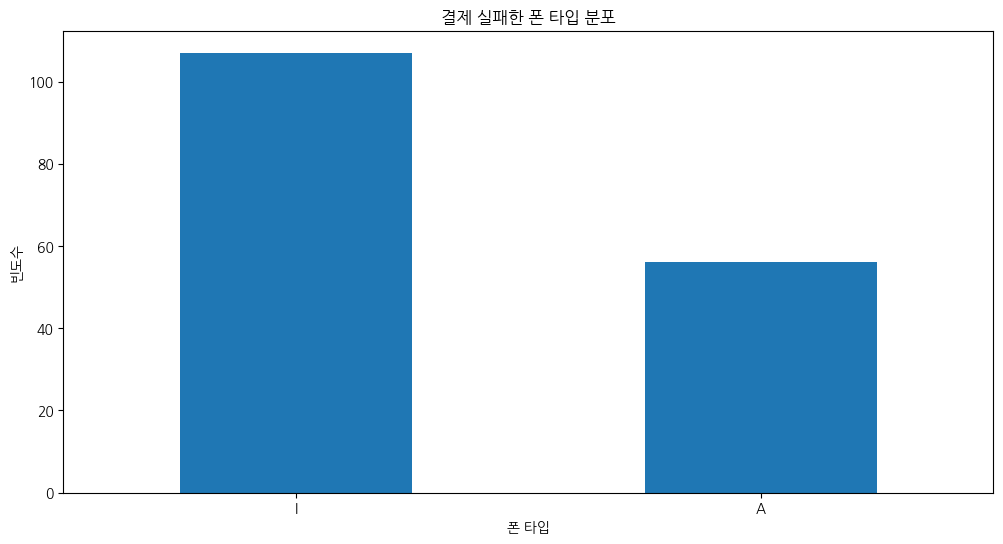

In [21]:
# 결제 실패한 폰type 시각화

df_dict["accounts_failpaymenthistory"].phone_type.value_counts()
plt.figure(figsize=(12, 6))
df_dict["accounts_failpaymenthistory"].phone_type.value_counts().plot(kind='bar')
plt.title("결제 실패한 폰 타입 분포")
plt.xlabel("폰 타입")
plt.ylabel("빈도수")
plt.xticks(rotation=0)
plt.show()

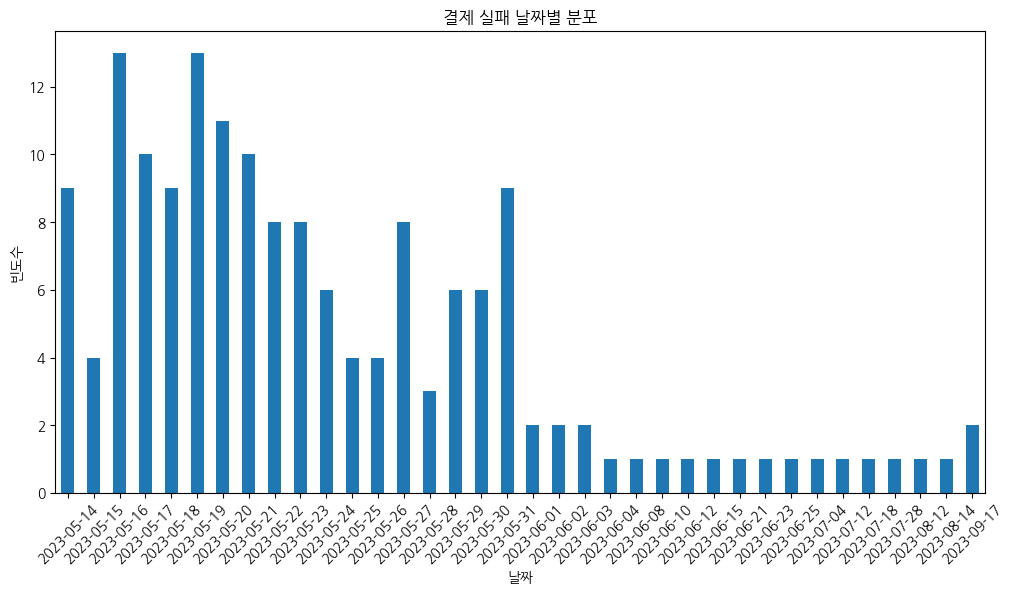

In [22]:
# date별로 언제 오류가 많이 생겼나?(서버의 오류가 있었나 확인)

df_dict["accounts_failpaymenthistory"].created_at.dt.date.value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.title("결제 실패 날짜별 분포")
plt.xlabel("날짜")
plt.ylabel("빈도수")
plt.xticks(rotation=45)
plt.show()

### 기타 아이디어 및 내용 정리
---
- 어느 시점에서 실패가 많은건지 
- id에 대해서 payment_id?로 해야하는지 그리고 id가 paymenthistory에 있는지 없는지
    - 만약 id가 두 데이터에서 겹치지 않는다면 하나의 테이블로 제작 후 거래가 실패했는지 성공했는지를 비교해볼 수 있을 듯

## accounts_timelinereport
---
---
### 공통 확인 부분

In [23]:
check_data_info(df_dict["accounts_timelinereport"])

데이터 타입 확인
결측치가 없습니다.
id 컬럼 제외한 중복값이 없습니다.
전체 중복값이 없습니다.
데이터프레임 크기 확인
(208, 6)
메모리 사용량
0.04 MB
기본 통계량
                  id    reason                     created_at  \
count     208.000000       208                            208   
unique           NaN         5                            NaN   
top              NaN  허위 사실 언급                            NaN   
freq             NaN        80                            NaN   
mean     9786.269231       NaN  2023-05-15 08:13:50.278846208   
min        28.000000       NaN            2023-05-06 04:44:57   
25%      6123.750000       NaN     2023-05-11 16:41:43.500000   
50%     10095.000000       NaN            2023-05-15 01:23:29   
75%     14182.250000       NaN            2023-05-18 18:01:18   
max     23108.000000       NaN            2023-06-02 08:30:06   
std      5713.767759       NaN                            NaN   

        reported_user_id       user_id  user_question_record_id  
count       2.080000e+02  2.080000e+02             2

,id,reason,created_at,reported_user_id,user_id,user_question_record_id
0,28,타인을 사칭함,2023-05-06 04:44:57,874587,885082,3920588
1,37,친구를 비하하거나 조롱하는 어투,2023-05-06 05:41:19,881048,881298,4018679
2,46,친구를 비하하거나 조롱하는 어투,2023-05-06 06:26:59,887882,881945,4120914
3,64,허위 사실 언급,2023-05-06 07:07:46,888610,893684,4143049
4,65,허위 사실 언급,2023-05-06 07:07:52,888610,893684,4143049


{'dtypes': id                                  int64
 reason                             object
 created_at                 datetime64[ns]
 reported_user_id                    int64
 user_id                             int64
 user_question_record_id             int64
 dtype: object,
 'null_count': id                         0
 reason                     0
 created_at                 0
 reported_user_id           0
 user_id                    0
 user_question_record_id    0
 dtype: int64,
 'null_rate': id                         0.0
 reason                     0.0
 created_at                 0.0
 reported_user_id           0.0
 user_id                    0.0
 user_question_record_id    0.0
 dtype: float64,
 'duplicate_excl_id': {'count': np.int64(0), 'rate': np.float64(0.0)},
 'duplicate_all': {'count': np.int64(0), 'rate': np.float64(0.0)},
 'shape': (208, 6),
 'memory_MB': np.float64(0.03511524200439453),
 'describe':                   id    reason                     created_at  \
 c

### EDA
---

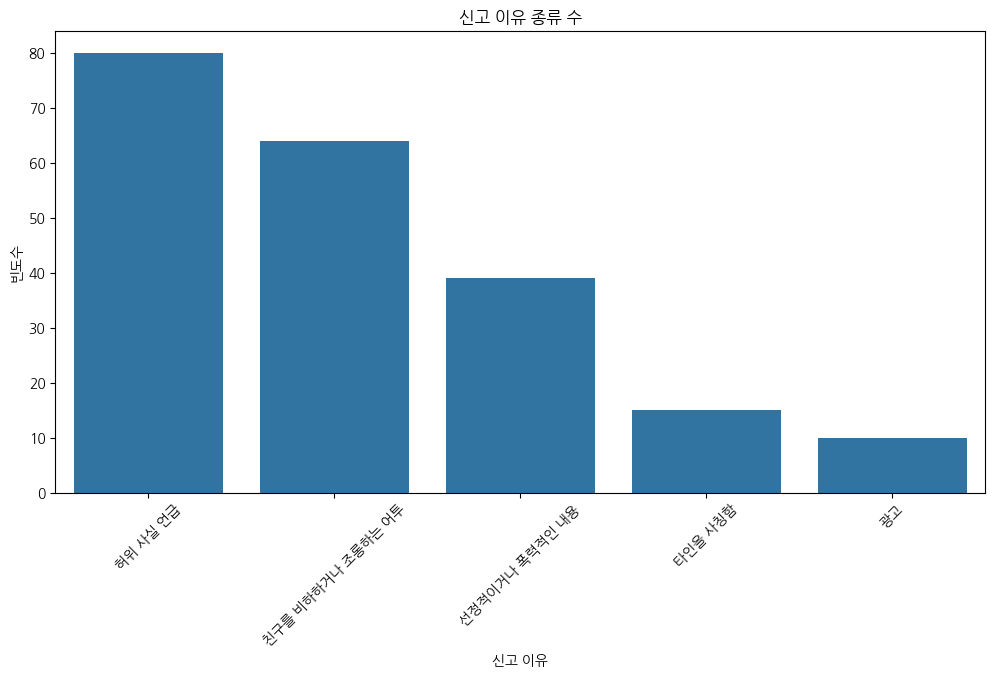

In [24]:
# 신고한 이유 종류 수 시각화
reason_count = df_dict["accounts_timelinereport"].reason.value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=reason_count.index, y=reason_count.values)
plt.title("신고 이유 종류 수")
plt.xlabel("신고 이유")
plt.ylabel("빈도수")
plt.xticks(rotation=45)
plt.show()

In [25]:
# 가장 많이 신고 받은 유저는?
top_reported_user = df_dict["accounts_timelinereport"].reported_user_id.value_counts().idxmax()

df_dict["accounts_timelinereport"][df_dict["accounts_timelinereport"].reported_user_id == top_reported_user]

,id,reason,created_at,reported_user_id,user_id,user_question_record_id
155,14175,친구를 비하하거나 조롱하는 어투,2023-05-18 16:20:12,1138757,1343904,67480549
162,14763,친구를 비하하거나 조롱하는 어투,2023-05-19 15:26:49,1138757,1343904,78776644
163,14814,친구를 비하하거나 조롱하는 어투,2023-05-19 17:03:58,1138757,1343904,78776644
164,14815,친구를 비하하거나 조롱하는 어투,2023-05-19 17:05:39,1138757,1343904,78776644
165,14816,친구를 비하하거나 조롱하는 어투,2023-05-19 17:05:42,1138757,1343904,78776644
166,14817,친구를 비하하거나 조롱하는 어투,2023-05-19 17:05:45,1138757,1343904,78776644
167,14818,친구를 비하하거나 조롱하는 어투,2023-05-19 17:05:48,1138757,1343904,78776644
168,14819,친구를 비하하거나 조롱하는 어투,2023-05-19 17:05:50,1138757,1343904,78776644
169,14820,친구를 비하하거나 조롱하는 어투,2023-05-19 17:05:54,1138757,1343904,78776644
170,14821,친구를 비하하거나 조롱하는 어투,2023-05-19 17:05:56,1138757,1343904,78776644


무슨 짓을 했길래 그리고 여러번 신고를 했는데 시간 차이가 얼마 나지 않은 것을 보면 또 로그 오류 같음
- 시간 오류를 해결 필요할 듯..

In [26]:
# 신고한 유저와 신고 당한 유저의 몇번 반복 신고를 했는지 확인
report_counts = df_dict["accounts_timelinereport"].groupby(['reported_user_id', 'user_id']).size().reset_index(name='report_count')
report_counts = report_counts.sort_values(by='report_count', ascending=False)

report_counts.head(10)

,reported_user_id,user_id,report_count
51,1138757,1343904,15
29,939196,944838,7
68,1156031,1173995,7
15,885129,914800,6
98,1225963,1291813,6
17,885473,867048,5
85,1187305,1221550,5
49,1131675,1152559,3
115,1272969,1295255,3
90,1207784,1214760,3


In [27]:
df_dict["accounts_timelinereport"][(df_dict["accounts_timelinereport"].reported_user_id == 939196) &(df_dict["accounts_timelinereport"].user_id == 944838)]

,id,reason,created_at,reported_user_id,user_id,user_question_record_id
17,740,허위 사실 언급,2023-05-07 06:14:57,939196,944838,5649541
18,741,허위 사실 언급,2023-05-07 06:15:00,939196,944838,5649541
19,742,허위 사실 언급,2023-05-07 06:15:02,939196,944838,5649541
25,1428,타인을 사칭함,2023-05-07 15:49:21,939196,944838,5849834
26,1429,타인을 사칭함,2023-05-07 15:49:24,939196,944838,5849834
27,1430,타인을 사칭함,2023-05-07 15:49:29,939196,944838,5849834
28,1431,허위 사실 언급,2023-05-07 15:49:31,939196,944838,5849834


### 기타 아이디어 및 내용 정리
---

몇 초 사이 여러번 신고당한 경우 처리 방법은?
- 같은 이유로 신고 당한 경우 하나의 값만 남기고 제거? 그렇다면 시간은?
- 다른 이유로 신고를 한 경우?
- 몇 초를 기준으로 세울 것인지
- 또한 마찬가지로 id가 중간에 없는 값들이 존재하는데 다른 신고 테이블과 id가 겹치지 않는지

## accounts_user_contacts
---
---
### 공통 확인 부분

In [28]:
check_data_info(df_dict["accounts_user_contacts"])

데이터 타입 확인
결측치가 없습니다.
id 컬럼 제외한 중복값이 없습니다.
전체 중복값이 없습니다.
데이터프레임 크기 확인
(5063, 4)
메모리 사용량
0.41 MB
기본 통계량
                  id  contacts_count invite_user_id_list       user_id
count   5.063000e+03     5063.000000                5063  5.063000e+03
unique           NaN             NaN                 928           NaN
top              NaN             NaN                  []           NaN
freq             NaN             NaN                3905           NaN
mean    2.840907e+06       25.986174                 NaN  1.114789e+06
std     2.895428e+06       13.601434                 NaN  2.187702e+05
min     2.590000e+02        0.000000                 NaN  8.473750e+05
25%     7.475970e+05       16.000000                 NaN  8.855155e+05
50%     1.580135e+06       24.000000                 NaN  1.119987e+06
75%     4.201598e+06       34.000000                 NaN  1.278826e+06
max     1.460827e+07      114.000000                 NaN  1.583629e+06


,id,contacts_count,invite_user_id_list,user_id
0,259,30,[],1167696
1,1756,79,[],863169
2,13742,21,[854615],857205
3,13754,29,[],851431
4,13756,28,[849318],855476


{'dtypes': id                      int64
 contacts_count          int64
 invite_user_id_list    object
 user_id                 int64
 dtype: object,
 'null_count': id                     0
 contacts_count         0
 invite_user_id_list    0
 user_id                0
 dtype: int64,
 'null_rate': id                     0.0
 contacts_count         0.0
 invite_user_id_list    0.0
 user_id                0.0
 dtype: float64,
 'duplicate_excl_id': {'count': np.int64(0), 'rate': np.float64(0.0)},
 'duplicate_all': {'count': np.int64(0), 'rate': np.float64(0.0)},
 'shape': (5063, 4),
 'memory_MB': np.float64(0.4124164581298828),
 'describe':                   id  contacts_count invite_user_id_list       user_id
 count   5.063000e+03     5063.000000                5063  5.063000e+03
 unique           NaN             NaN                 928           NaN
 top              NaN             NaN                  []           NaN
 freq             NaN             NaN                3905           Na

### EDA
---

In [29]:
# 데이터 head 확인
display(df_dict["accounts_user_contacts"].head())

# contacts_count 가장 많은 유저 적은 유저 확인
print("가장 많은 연락처를 가진 유저:", df_dict["accounts_user_contacts"].contacts_count.max())
print("가장 적은 연락처를 가진 유저:", df_dict["accounts_user_contacts"].contacts_count.min())

# invite_user_id_list가 비어있는 유저 수 확인
empty_invite_count = df_dict["accounts_user_contacts"][df_dict["accounts_user_contacts"].invite_user_id_list.apply(lambda x: len(x) == 0)].shape[0]
print(f"초대된 유저가 없는 유저 수: {empty_invite_count}")

# invite_user_id_list가 가장 긴 유저 확인
max_invite_user = df_dict["accounts_user_contacts"].loc[df_dict["accounts_user_contacts"].invite_user_id_list.apply(len).idxmax()]
print("초대된 유저가 가장 많은 유저의 ID:", max_invite_user['user_id'])

# invite_user_id_list가 가장 긴 유저의 정보 확인
df_dict["accounts_user_contacts"][df_dict["accounts_user_contacts"].user_id == max_invite_user['user_id']]

,id,contacts_count,invite_user_id_list,user_id
0,259,30,[],1167696
1,1756,79,[],863169
2,13742,21,[854615],857205
3,13754,29,[],851431
4,13756,28,[849318],855476


가장 많은 연락처를 가진 유저: 114
가장 적은 연락처를 가진 유저: 0
초대된 유저가 없는 유저 수: 0
초대된 유저가 가장 많은 유저의 ID: 1207606


,id,contacts_count,invite_user_id_list,user_id
1009,593562,62,"[1050526, 1050496, 1167888, 1185543, 1186531, ...",1207606


### 기타 아이디어 및 내용 정리
---
list로 되어있다보니 분할해서 저장해야할 듯함(전처리) 필요하다면

## polls_question
---
---
### 공통 확인 부분

In [30]:
check_data_info(df_dict["polls_question"])

데이터 타입 확인
결측치가 없습니다.
id 컬럼 제외한 중복값 확인
34
비율
0.677
전체 중복값이 없습니다.
데이터프레임 크기 확인
(5025, 3)
메모리 사용량
0.88 MB
기본 통계량
                 id question_text                     created_at
count   5025.000000          5025                           5025
unique          NaN          3903                            NaN
top             NaN          vote                            NaN
freq            NaN            56                            NaN
mean    2619.897512           NaN  2023-05-26 17:49:11.666268672
min       99.000000           NaN            2023-03-31 15:22:53
25%     1365.000000           NaN            2023-05-15 14:03:03
50%     2621.000000           NaN            2023-06-02 08:06:53
75%     3877.000000           NaN            2023-06-06 06:10:14
max     5133.000000           NaN            2023-06-06 06:15:52
std     1452.438472           NaN                            NaN


,id,question_text,created_at
0,99,가장 신비한 매력이 있는 사람은?,2023-03-31 15:22:53
1,100,"""이 사람으로 한 번 살아보고 싶다"" 하는 사람은?",2023-03-31 15:22:53
2,101,미래의 틱톡커는?,2023-03-31 15:22:54
3,102,여기서 제일 특이한 친구는?,2023-03-31 15:22:54
4,103,가장 지켜주고 싶은 사람은?,2023-03-31 15:22:55


{'dtypes': id                        int64
 question_text            object
 created_at       datetime64[ns]
 dtype: object,
 'null_count': id               0
 question_text    0
 created_at       0
 dtype: int64,
 'null_rate': id               0.0
 question_text    0.0
 created_at       0.0
 dtype: float64,
 'duplicate_excl_id': {'count': np.int64(34), 'rate': np.float64(0.677)},
 'duplicate_all': {'count': np.int64(0), 'rate': np.float64(0.0)},
 'shape': (5025, 3),
 'memory_MB': np.float64(0.8843374252319336),
 'describe':                  id question_text                     created_at
 count   5025.000000          5025                           5025
 unique          NaN          3903                            NaN
 top             NaN          vote                            NaN
 freq            NaN            56                            NaN
 mean    2619.897512           NaN  2023-05-26 17:49:11.666268672
 min       99.000000           NaN            2023-03-31 15:22:53
 25%    

### EDA
---

In [31]:
# id 컬럼을 제외한 중복 데이터 존재하므로 확인
display(df_dict["polls_question"][df_dict["polls_question"].drop(columns=['id']).duplicated()])

# 중복 데이터 제거
df_dict["polls_question"] = df_dict["polls_question"].drop_duplicates(subset=df_dict["polls_question"].columns.difference(['id']))

,id,question_text,created_at
1543,1652,vote,2023-06-02 08:06:23
1544,1653,vote,2023-06-02 08:06:23
1545,1654,vote,2023-06-02 08:06:23
1546,1655,vote,2023-06-02 08:06:23
1547,1656,vote,2023-06-02 08:06:23
1548,1657,vote,2023-06-02 08:06:23
1549,1658,vote,2023-06-02 08:06:23
1561,1670,회사 비서에 잘 어울리는 사람,2023-06-02 08:06:23
1640,1749,vote,2023-06-02 08:06:26
1664,1773,플래너 잘 쓸 것 같은 사람은?,2023-06-02 08:06:26


유니크한 질문의 개수 : 3903


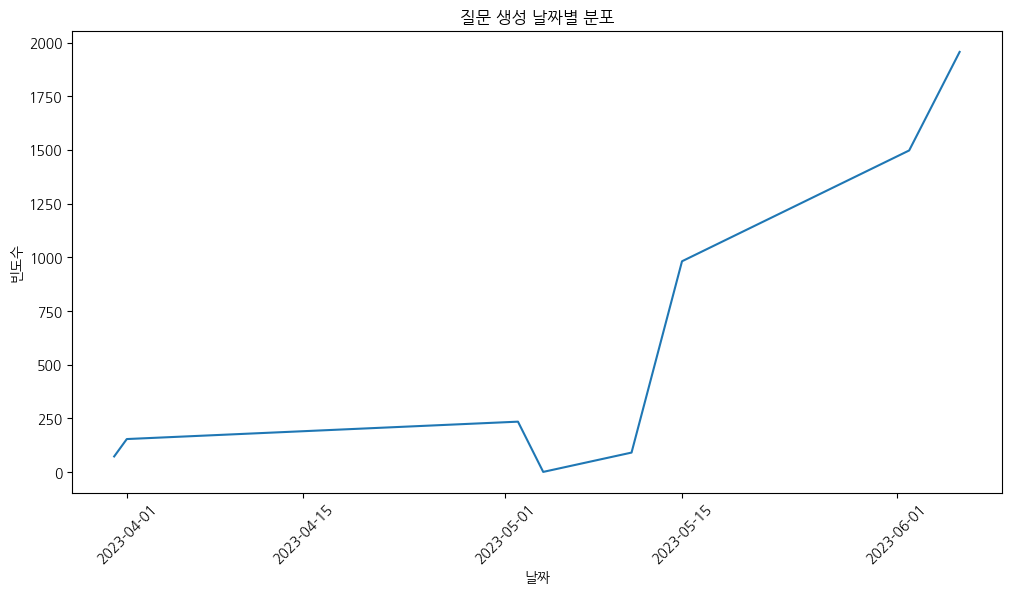

In [32]:
# 질문의 유니한 개수 확인
unique_questions_count = df_dict["polls_question"].question_text.nunique()
print(f"유니크한 질문의 개수 : {unique_questions_count}")

# 언제 질문이 많이 만들어졌는지 시각화
df_dict["polls_question"].created_at.dt.date.value_counts().sort_index().plot(kind='line', figsize=(12, 6))
plt.title("질문 생성 날짜별 분포")
plt.xlabel("날짜")
plt.ylabel("빈도수")
plt.xticks(rotation=45)
plt.show()

In [33]:
# id 컬럼 question_id로 변경
df_dict["polls_question"].rename(columns={"id":"question_id"}, inplace=True)

# 변경 확인
display(df_dict["polls_question"].head())

,question_id,question_text,created_at
0,99,가장 신비한 매력이 있는 사람은?,2023-03-31 15:22:53
1,100,"""이 사람으로 한 번 살아보고 싶다"" 하는 사람은?",2023-03-31 15:22:53
2,101,미래의 틱톡커는?,2023-03-31 15:22:54
3,102,여기서 제일 특이한 친구는?,2023-03-31 15:22:54
4,103,가장 지켜주고 싶은 사람은?,2023-03-31 15:22:55


In [78]:
print(f'유니크한 질문 수 : {df_dict["polls_question"].question_text.nunique()}')

print(f'질문마다 얼마나 존재하는지 : \n{df_dict["polls_question"].question_text.value_counts()}')

display(df_dict['polls_question'][df_dict["polls_question"].question_text == '2세가 가장 귀여울 것 같은 사람은?'])

유니크한 질문 수 : 3903
질문마다 얼마나 존재하는지 : 
question_text
vote                            39
2세가 가장 귀여울 것 같은 사람은?             3
같이 밥먹고 싶은 사람은?                   3
눈이 제일 큰 사람은?                     3
지금 뭐하는지 궁금한 친구                   3
                                ..
대학가서 용될것 같은 사람은?                 1
조용한 매력이 있는 친구                    1
샤워 1시간 동안 할 것 같은 사람은?            1
시간 약속을 제일 잘 지킬것 같은 사람은?          1
너에게 칭찬을 받는다면 가장 기분 좋을 것 같아!      1
Name: count, Length: 3903, dtype: int64


,question_id,question_text,created_at
188,287,2세가 가장 귀여울 것 같은 사람은?,2023-04-01 11:09:35
1282,1391,2세가 가장 귀여울 것 같은 사람은?,2023-05-15 14:03:15
3051,3160,2세가 가장 귀여울 것 같은 사람은?,2023-06-02 08:07:09


### 기타 아이디어 및 내용 정리
---
- 마찬가지로 id 컬럼 question_id로 변경 필요
- 질문 하나가 어느 정도로 지속되는지 확인
    - 생성된 후 언제 가장 활발하게 참여되는지
    - 지역에 따라서는 다른지
    - 같은 질문이여도 여러 question_id 가질 수 있음..단지 생긴 시간 차이 존재함함

## accounts_school
---
---
### 공통 확인 부분

In [34]:
check_data_info(df_dict["accounts_school"])

데이터 타입 확인
결측치가 없습니다.
id 컬럼 제외한 중복값 확인
458
비율
7.696
전체 중복값이 없습니다.
데이터프레임 크기 확인
(5951, 4)
메모리 사용량
1.13 MB
기본 통계량
                 id  address  student_count school_type
count   5951.000000     5951    5951.000000        5951
unique          NaN      278            NaN           2
top             NaN  경기도 화성시            NaN           M
freq            NaN       78            NaN        3290
mean    2981.026046      NaN     113.772979         NaN
std     1719.084020      NaN     102.863428         NaN
min        4.000000      NaN       0.000000         NaN
25%     1493.500000      NaN      16.000000         NaN
50%     2981.000000      NaN      97.000000         NaN
75%     4469.500000      NaN     183.000000         NaN
max     5965.000000      NaN     578.000000         NaN


,id,address,student_count,school_type
0,4,충청북도 충주시,239,H
1,5,충청북도 충주시,160,M
2,6,충청북도 충주시,200,H
3,7,충청북도 충주시,114,H
4,8,충청북도 충주시,139,M


{'dtypes': id                int64
 address          object
 student_count     int64
 school_type      object
 dtype: object,
 'null_count': id               0
 address          0
 student_count    0
 school_type      0
 dtype: int64,
 'null_rate': id               0.0
 address          0.0
 student_count    0.0
 school_type      0.0
 dtype: float64,
 'duplicate_excl_id': {'count': np.int64(458), 'rate': np.float64(7.696)},
 'duplicate_all': {'count': np.int64(0), 'rate': np.float64(0.0)},
 'shape': (5951, 4),
 'memory_MB': np.float64(1.125223159790039),
 'describe':                  id  address  student_count school_type
 count   5951.000000     5951    5951.000000        5951
 unique          NaN      278            NaN           2
 top             NaN  경기도 화성시            NaN           M
 freq            NaN       78            NaN        3290
 mean    2981.026046      NaN     113.772979         NaN
 std     1719.084020      NaN     102.863428         NaN
 min        4.000000      Na

### EDA
---

In [35]:
# 중복 데이터가 존재하므로 확인
df_dict["accounts_school"][df_dict["accounts_school"].drop(columns=['id']).duplicated()]

,id,address,student_count,school_type
26,30,충청북도 충주시,20,M
31,35,충청북도 충주시,0,H
110,114,충청북도 청주시 상당구,0,H
120,124,충청북도 청주시 상당구,2,M
145,149,충청북도 제천시,0,M
...,...,...,...,...
5898,5906,강원도 강릉시,81,H
5915,5923,강원도 강릉시,197,H
5933,5947,경기도 성남시 분당구,0,H
5947,5961,인천광역시 서구,77,M


In [36]:
# 특정 조건 출력
display(df_dict["accounts_school"][(df_dict["accounts_school"].address == "충청북도 충주시") & 
                                   (df_dict["accounts_school"].student_count == 20) & 
                                   (df_dict["accounts_school"].school_type == "M")])

,id,address,student_count,school_type
11,15,충청북도 충주시,20,M
26,30,충청북도 충주시,20,M


In [37]:
# id 컬럼 school_id로 변경
df_dict["accounts_school"].rename(columns={"id": "school_id"}, inplace=True)

# 변경 확인
display(df_dict["accounts_school"].head())

,school_id,address,student_count,school_type
0,4,충청북도 충주시,239,H
1,5,충청북도 충주시,160,M
2,6,충청북도 충주시,200,H
3,7,충청북도 충주시,114,H
4,8,충청북도 충주시,139,M


### 기타 아이디어 및 내용 정리
---

- 지역을 좀 더 분할해서 저장해둬야할까 싶음
    - 유창님 코드 확인해서 돌리면 될 듯
- 학교 type에 따른 차이가 큰가
- 학생 수는 얼마나 차이가 발생하는가

## accounts_nearbyschool
---
---
### 공통 확인 부분

In [38]:
check_data_info(df_dict["accounts_nearbyschool"])

데이터 타입 확인
결측치가 없습니다.
id 컬럼 제외한 중복값이 없습니다.
전체 중복값이 없습니다.
데이터프레임 크기 확인
(59500, 4)
메모리 사용량
1.82 MB
기본 통계량
                  id      distance  nearby_school_id     school_id
count   59500.000000  59500.000000      59500.000000  59500.000000
mean   148770.500000      0.055338       2976.695882   2980.524538
std     17176.314845      0.604024       1706.965231   1718.663078
min    119021.000000      0.000000          4.000000      4.000000
25%    133895.750000      0.011484       1518.000000   1493.000000
50%    148770.500000      0.021658       2973.000000   2980.500000
75%    163645.250000      0.064555       4448.000000   4469.000000
max    178520.000000     49.296594       5964.000000   5964.000000


,id,distance,nearby_school_id,school_id
0,119021,0.004564,6,7
1,119022,0.010787,13,7
2,119023,0.012928,20,7
3,119024,0.013590,4,7
4,119025,0.014122,24,7


{'dtypes': id                    int64
 distance            float64
 nearby_school_id      int64
 school_id             int64
 dtype: object,
 'null_count': id                  0
 distance            0
 nearby_school_id    0
 school_id           0
 dtype: int64,
 'null_rate': id                  0.0
 distance            0.0
 nearby_school_id    0.0
 school_id           0.0
 dtype: float64,
 'duplicate_excl_id': {'count': np.int64(0), 'rate': np.float64(0.0)},
 'duplicate_all': {'count': np.int64(0), 'rate': np.float64(0.0)},
 'shape': (59500, 4),
 'memory_MB': np.float64(1.8159217834472656),
 'describe':                   id      distance  nearby_school_id     school_id
 count   59500.000000  59500.000000      59500.000000  59500.000000
 mean   148770.500000      0.055338       2976.695882   2980.524538
 std     17176.314845      0.604024       1706.965231   1718.663078
 min    119021.000000      0.000000          4.000000      4.000000
 25%    133895.750000      0.011484       1518.00

### EDA
---

In [39]:
# 가장 많은 근접한 학교 수를 가진 학교 확인
max_nearby_count = df_dict["accounts_nearbyschool"].groupby('school_id').size().max()
print(f"가장 많은 근접한 학교 수를 가진 학교의 근접한 학교 수: {max_nearby_count}")

# 근접한 학교 수가 많은 학교 확인
display(df_dict["accounts_nearbyschool"][df_dict["accounts_nearbyschool"].school_id == df_dict["accounts_nearbyschool"].groupby('school_id').size().idxmax()])

# 가장 거리가 먼 경우 확인
max_distance = df_dict["accounts_nearbyschool"].distance.max()
print(f"가장 먼 거리: {max_distance}")

display(df_dict["accounts_nearbyschool"][df_dict["accounts_nearbyschool"].distance == max_distance])

# 가장 거리가 가까운 경우 확인
min_distance = df_dict["accounts_nearbyschool"].distance.min()
print(f"가장 가까운 거리: {min_distance}")

display(df_dict["accounts_nearbyschool"][df_dict["accounts_nearbyschool"].distance == min_distance])

가장 많은 근접한 학교 수를 가진 학교의 근접한 학교 수: 10


,id,distance,nearby_school_id,school_id
80,119101,0.007764,13,4
81,119102,0.009783,6,4
82,119103,0.011215,26,4
83,119104,0.011523,27,4
84,119105,0.011523,28,4
85,119106,0.013590,7,4
86,119107,0.015231,24,4
87,119108,0.023101,25,4
88,119109,0.026120,20,4
89,119110,0.000000,4,4


가장 먼 거리: 49.2965935873


,id,distance,nearby_school_id,school_id
59308,178329,49.296594,615,5948


가장 가까운 거리: 0.0


,id,distance,nearby_school_id,school_id
9,119030,0.0,7,7
19,119040,0.0,8,8
29,119050,0.0,22,22
39,119060,0.0,13,13
49,119070,0.0,20,20
...,...,...,...,...
59459,178480,0.0,5959,5959
59469,178490,0.0,5960,5960
59479,178500,0.0,5964,5964
59489,178510,0.0,5963,5963


In [40]:
# nearby_school_id와 school_id가 동일한 경우 확인
display(df_dict["accounts_nearbyschool"][df_dict["accounts_nearbyschool"].nearby_school_id == df_dict["accounts_nearbyschool"].school_id])

# 크기는 어느 정도인가?
print(f'nearby_school_id와 school_id가 동일한 데이터 크기: {df_dict["accounts_nearbyschool"][df_dict["accounts_nearbyschool"].nearby_school_id == df_dict["accounts_nearbyschool"].school_id].shape}')

,id,distance,nearby_school_id,school_id
9,119030,0.0,7,7
19,119040,0.0,8,8
29,119050,0.0,22,22
39,119060,0.0,13,13
49,119070,0.0,20,20
...,...,...,...,...
59459,178480,0.0,5959,5959
59469,178490,0.0,5960,5960
59479,178500,0.0,5964,5964
59489,178510,0.0,5963,5963


nearby_school_id와 school_id가 동일한 데이터 크기: (5950, 4)


In [41]:
# 거리가 가까운 학교 중 nearby_school_id != school_id인 경우 확인
nearby_mismatch = df_dict["accounts_nearbyschool"][df_dict["accounts_nearbyschool"].nearby_school_id != df_dict["accounts_nearbyschool"].school_id]
if not nearby_mismatch.empty:
    print("근접한 학교 ID가 학교 ID와 일치하지 않는 경우:")
    display(nearby_mismatch)
    
# 그 중 가장 거리가 가까운 경우 확인
nearby_mismatch_min_distance = nearby_mismatch.distance.min()
print(f"근접한 학교 ID가 학교 ID와 일치하지 않는 경우 중 가장 가까운 거리: {nearby_mismatch_min_distance}")
display(nearby_mismatch[nearby_mismatch.distance == nearby_mismatch_min_distance])

근접한 학교 ID가 학교 ID와 일치하지 않는 경우:


,id,distance,nearby_school_id,school_id
0,119021,0.004564,6,7
1,119022,0.010787,13,7
2,119023,0.012928,20,7
3,119024,0.013590,4,7
4,119025,0.014122,24,7
...,...,...,...,...
59494,178515,0.016067,1471,5961
59495,178516,0.018277,1498,5961
59496,178517,0.018652,1474,5961
59497,178518,0.021143,1466,5961


근접한 학교 ID가 학교 ID와 일치하지 않는 경우 중 가장 가까운 거리: 0.0


,id,distance,nearby_school_id,school_id
220,119241,0.0,28,27
230,119251,0.0,27,28
3170,122191,0.0,324,323
3200,122221,0.0,323,324
3220,122241,0.0,329,328
...,...,...,...,...
55460,174481,0.0,5553,5552
55950,174971,0.0,5619,5598
56120,175141,0.0,5598,5619
57040,176061,0.0,5720,5713


### 기타 아이디어 및 내용 정리
---

자기 자신을 포함한 경우 존재
- 제거 필요

## accounts_blockrecord
---
---
### 공통 확인 부분

In [42]:
check_data_info(df_dict["accounts_blockrecord"])

데이터 타입 확인
결측치가 없습니다.
id 컬럼 제외한 중복값 확인
5
비율
0.026
전체 중복값이 없습니다.


데이터프레임 크기 확인
(19482, 5)
메모리 사용량
2.91 MB
기본 통계량
                  id   reason                     created_at  block_user_id  \
count   19482.000000    19482                          19482   1.948200e+04   
unique           NaN        7                            NaN            NaN   
top              NaN  모르는 사람임                            NaN            NaN   
freq             NaN     9640                            NaN            NaN   
mean    12694.563495      NaN  2023-05-25 19:12:26.516579584   1.183576e+06   
min         1.000000      NaN            2023-05-04 23:01:53   8.327400e+05   
25%      6514.250000      NaN            2023-05-14 02:19:01   1.001336e+06   
50%     12731.000000      NaN            2023-05-22 11:37:20   1.173390e+06   
75%     18984.750000      NaN            2023-05-28 11:04:33   1.357468e+06   
max     25361.000000      NaN            2024-05-06 13:03:37   1.582869e+06   
std      7220.338199      NaN                            NaN   2.049517e+05   

    

,id,reason,created_at,block_user_id,user_id
0,1,그냥...,2023-05-04 23:01:53,867483,878476
1,2,친구 사이가 어색해짐,2023-05-05 01:17:08,867190,867564
2,3,나랑 관련 없는 질문을 자꾸 보냄,2023-05-05 01:50:55,875110,875261
3,6,그냥...,2023-05-05 05:21:52,883696,883511
4,7,그냥...,2023-05-05 06:40:34,871349,870177


{'dtypes': id                        int64
 reason                   object
 created_at       datetime64[ns]
 block_user_id             int64
 user_id                   int64
 dtype: object,
 'null_count': id               0
 reason           0
 created_at       0
 block_user_id    0
 user_id          0
 dtype: int64,
 'null_rate': id               0.0
 reason           0.0
 created_at       0.0
 block_user_id    0.0
 user_id          0.0
 dtype: float64,
 'duplicate_excl_id': {'count': np.int64(5), 'rate': np.float64(0.026)},
 'duplicate_all': {'count': np.int64(0), 'rate': np.float64(0.0)},
 'shape': (19482, 5),
 'memory_MB': np.float64(2.9083633422851562),
 'describe':                   id   reason                     created_at  block_user_id  \
 count   19482.000000    19482                          19482   1.948200e+04   
 unique           NaN        7                            NaN            NaN   
 top              NaN  모르는 사람임                            NaN            NaN   


### EDA
---

,id,reason,created_at,block_user_id,user_id
1126,1510,모르는 사람임,2023-05-08 06:31:49,977940,967723
1883,2556,모르는 사람임,2023-05-09 11:55:42,1025677,971524
1885,2558,모르는 사람임,2023-05-09 11:55:43,1025677,971524
1886,2559,모르는 사람임,2023-05-09 11:55:43,1025677,971524
4616,6162,모르는 사람임,2023-05-13 14:54:47,931725,859334


유니크한 차단 이유: ['그냥...' '친구 사이가 어색해짐' '나랑 관련 없는 질문을 자꾸 보냄' '기타' '모르는 사람임'
 '너무 많은 양의 질문을 보냄' '사칭 계정']


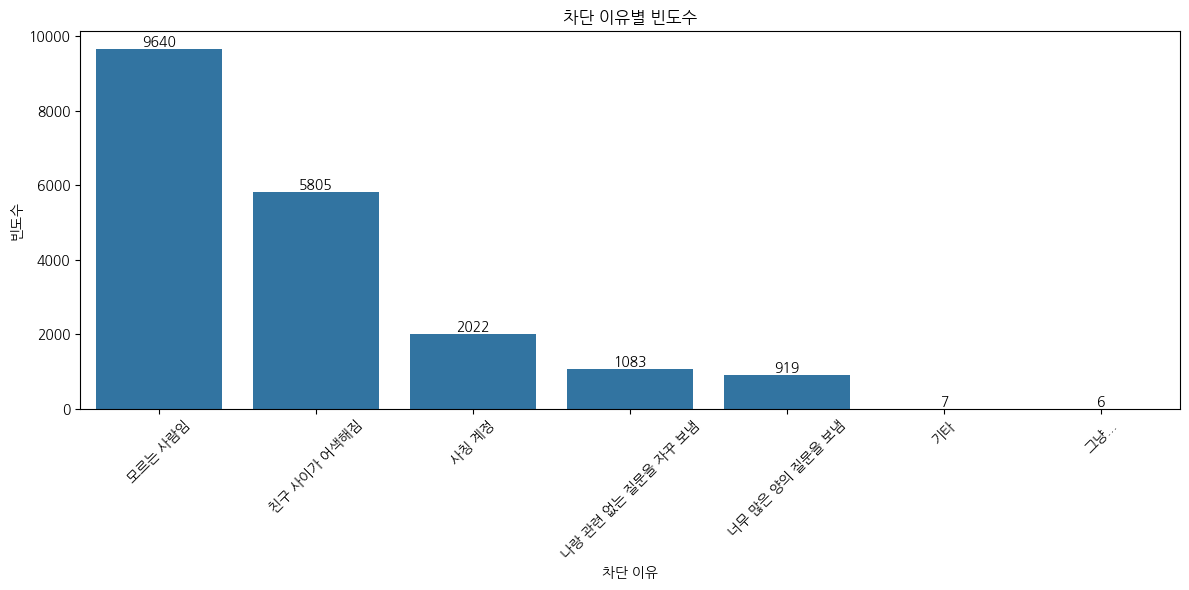

In [43]:
# 중복된 데이터 존재하므로 확인
display(df_dict["accounts_blockrecord"][df_dict["accounts_blockrecord"].drop(columns=['id']).duplicated()])

# reason 컬럼의 유니크한 값 확인
unique_reasons = df_dict["accounts_blockrecord"].reason.unique()
print(f"유니크한 차단 이유: {unique_reasons}")

# 차단 이유별 빈도수 시각화 & 차단 이유 위에 각 빈도수 표시
plt.figure(figsize=(12, 6))
sns.countplot(data=df_dict["accounts_blockrecord"], x='reason', order=df_dict["accounts_blockrecord"].reason.value_counts().index)
plt.title("차단 이유별 빈도수")
plt.xlabel("차단 이유")
plt.ylabel("빈도수")
for index, value in enumerate(df_dict["accounts_blockrecord"].reason.value_counts()):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 기타 아이디어 및 내용 정리
---
- 별다른 아이디어는 모르겠음

## accounts_group
---
---
### 공통 확인 부분

In [44]:
check_data_info(df_dict["accounts_group"])

데이터 타입 확인
결측치가 없습니다.
id 컬럼 제외한 중복값 확인
5
비율
0.006
전체 중복값이 없습니다.
데이터프레임 크기 확인
(84515, 4)
메모리 사용량
2.58 MB
기본 통계량
                 id         grade     class_num     school_id
count  84515.000000  84515.000000  84515.000000  84515.000000
mean   42279.376087      2.113992      5.318606   3079.496468
std    24400.962630      0.754896      4.089901   1675.036093
min        1.000000      1.000000      0.000000      1.000000
25%    21147.500000      2.000000      2.000000   1752.000000
50%    42279.000000      2.000000      4.000000   3023.000000
75%    63411.500000      3.000000      7.000000   4620.000000
max    84546.000000     20.000000     41.000000   5965.000000


,id,grade,class_num,school_id
0,1,1,1,1
1,8,3,2,1
2,9,3,3,1
3,10,2,2,1
4,11,2,3,1


{'dtypes': id           int64
 grade        int64
 class_num    int64
 school_id    int64
 dtype: object,
 'null_count': id           0
 grade        0
 class_num    0
 school_id    0
 dtype: int64,
 'null_rate': id           0.0
 grade        0.0
 class_num    0.0
 school_id    0.0
 dtype: float64,
 'duplicate_excl_id': {'count': np.int64(5), 'rate': np.float64(0.006)},
 'duplicate_all': {'count': np.int64(0), 'rate': np.float64(0.0)},
 'shape': (84515, 4),
 'memory_MB': np.float64(2.5793190002441406),
 'describe':                  id         grade     class_num     school_id
 count  84515.000000  84515.000000  84515.000000  84515.000000
 mean   42279.376087      2.113992      5.318606   3079.496468
 std    24400.962630      0.754896      4.089901   1675.036093
 min        1.000000      1.000000      0.000000      1.000000
 25%    21147.500000      2.000000      2.000000   1752.000000
 50%    42279.000000      2.000000      4.000000   3023.000000
 75%    63411.500000      3.000000    

### EDA
---

In [45]:
# 중복 데이터 확인
display(df_dict["accounts_group"][df_dict["accounts_group"].drop(columns=['id']).duplicated()])

# 특정 조건 충족 데이터 확인
display(df_dict["accounts_group"][(df_dict["accounts_group"].grade == 3) & 
                                  (df_dict['accounts_group'].class_num == 1) & 
                                  (df_dict["accounts_group"].school_id == 5900)])


,id,grade,class_num,school_id
73208,73234,3,1,5900
76437,76464,1,4,4383
77093,77120,1,1,5899
79779,79806,3,1,4383
82087,82115,2,20,5900


,id,grade,class_num,school_id
58902,58927,3,1,5900
73208,73234,3,1,5900


무엇을 확인하고자 하느냐        
같은 학교, 학년, 반에 두 가지 group_id가 있는데 다른 데이터에서 두 경우가 모두 쓰이나?

In [46]:
# 임시로 확인하기 위해서 데이터를 불러와볼까?

print("group_id가 58902인 경우")
display(df_dict["accounts_user"][df_dict["accounts_user"].group_id == 58902])

print("group_id가 73234인 경우") 
display(df_dict["accounts_user"][df_dict["accounts_user"].group_id == 73234])

# 두 group_id 모두 존재함

group_id가 58902인 경우


,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id
373041,1249386,0,0,F,600,"[1346881, 1511580]",1,2023-05-14 05:25:24.088419,[],[],N,0,1,0,0,58902.0
609989,1511580,0,0,F,300,"[1249386, 1346881]",0,2023-05-25 15:16:15.928187,[],[],N,0,1,0,0,58902.0


group_id가 73234인 경우


,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id
537811,1431600,0,0,M,955,"[1430017, 1416705, 1239556, 1479686, 1408519, ...",1,2023-05-21 13:29:14.635280,[],"[1422866, 1246178, 1345854, 1395504, 1398656, ...",N,0,1,0,79,73234.0
572609,1470006,0,0,M,315,"[1574787, 1239556, 1405195, 1516429, 1453710, ...",1,2023-05-23 09:26:44.084020,[],[],N,0,0,0,1,73234.0
577674,1475641,0,0,M,6611,"[1398656, 1574787, 1239556, 1415690, 1405195, ...",0,2023-05-23 13:20:30.550851,[],[],N,2,1,0,15,73234.0
595419,1495340,0,0,M,460,"[1456714, 1453163, 1444974, 1490478, 1431600, ...",1,2023-05-24 13:55:04.591311,[],[],N,0,1,0,15,73234.0
628157,1531583,0,0,M,594,"[1416705, 1430017, 1239556, 1479686, 1408519, ...",1,2023-05-27 15:51:09.564672,[],"[1399478, 1399753, 1239556, 1395504, 1420128]",N,0,1,0,69,73234.0
631906,1535516,0,0,F,797,"[1509267, 1532832, 1236264, 1249323, 1495340, ...",1,2023-05-28 09:23:14.701842,[],[],N,0,1,0,24,73234.0


### 기타 아이디어 및 내용 정리
---
- id 컬럼을 group_id로 변경
    - 같은 group을 의미하는데 group_id가 2가지인 경우 식별 -> 다른 테이블에서 둘 다 사용됨
    

## polls_questionreport
---
---
### 공통 확인 부분

In [47]:
check_data_info(df_dict["polls_questionreport"])

데이터 타입 확인
결측치가 없습니다.
id 컬럼 제외한 중복값이 없습니다.


전체 중복값이 없습니다.
데이터프레임 크기 확인
(51424, 5)
메모리 사용량
7.69 MB
기본 통계량
                  id reason                     created_at   question_id  \
count   51424.000000  51424                          51424  51424.000000   
unique           NaN     11                            NaN           NaN   
top              NaN  그냥 싫어                            NaN           NaN   
freq             NaN  28446                            NaN           NaN   
mean    28027.358587    NaN  2023-05-21 22:12:41.641120768    733.099098   
min         1.000000    NaN            2023-04-19 06:20:35     99.000000   
25%     14020.750000    NaN  2023-05-13 01:36:21.249999872    305.000000   
50%     28047.500000    NaN            2023-05-18 14:33:45    494.000000   
75%     42084.250000    NaN            2023-05-26 08:45:25   1021.000000   
max     55767.000000    NaN            2024-05-05 14:56:25   5110.000000   
std     16163.108294    NaN                            NaN    666.021729   

             user_id  
cou

,id,reason,created_at,question_id,user_id
0,1,이 질문은 재미없어요,2023-04-19 06:20:35,250,837556
1,2,이 질문은 재미없어요,2023-04-19 06:58:09,113,837672
2,3,불쾌한 내용이 포함되어 있음,2023-04-19 06:58:17,113,837672
3,4,어떻게 이런 생각을? 이 질문 최고!,2023-04-19 08:12:42,119,837922
4,5,어떻게 이런 생각을? 이 질문 최고!,2023-04-19 08:12:50,119,837922


{'dtypes': id                      int64
 reason                 object
 created_at     datetime64[ns]
 question_id             int64
 user_id                 int64
 dtype: object,
 'null_count': id             0
 reason         0
 created_at     0
 question_id    0
 user_id        0
 dtype: int64,
 'null_rate': id             0.0
 reason         0.0
 created_at     0.0
 question_id    0.0
 user_id        0.0
 dtype: float64,
 'duplicate_excl_id': {'count': np.int64(0), 'rate': np.float64(0.0)},
 'duplicate_all': {'count': np.int64(0), 'rate': np.float64(0.0)},
 'shape': (51424, 5),
 'memory_MB': np.float64(7.693267822265625),
 'describe':                   id reason                     created_at   question_id  \
 count   51424.000000  51424                          51424  51424.000000   
 unique           NaN     11                            NaN           NaN   
 top              NaN  그냥 싫어                            NaN           NaN   
 freq             NaN  28446                 

### EDA
---

유니크한 신고 이유 개수: 11


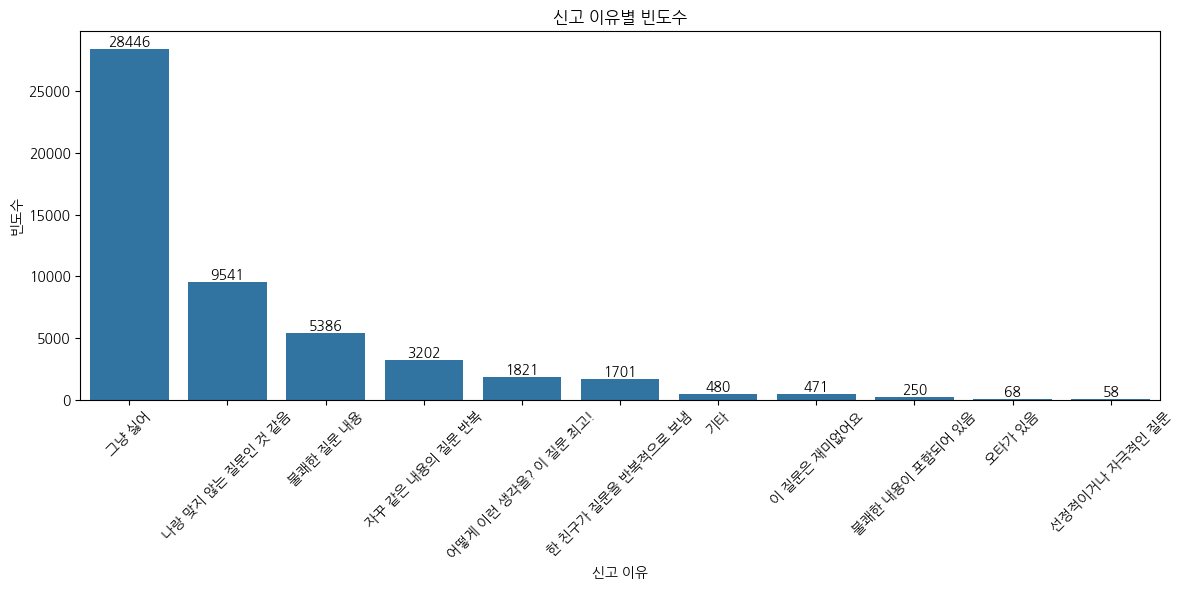

In [48]:
# reason 의 nunique 값 확인
print(f"유니크한 신고 이유 개수: {df_dict['polls_questionreport'].reason.nunique()}")

# reason 의 unique 값 분포 확인
plt.figure(figsize=(12, 6))
sns.countplot(data=df_dict["polls_questionreport"], x='reason', order=df_dict["polls_questionreport"].reason.value_counts().index)
plt.title("신고 이유별 빈도수")
plt.xlabel("신고 이유")
plt.ylabel("빈도수")
for index, value in enumerate(df_dict["polls_questionreport"].reason.value_counts()):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 기타 아이디어 및 내용 정리
---
- 좋은 이유에 있어서도 신고를 하는 경우도 존재함
    - 그렇다면 좋은 이유로 신고를 한 경우 그 질문은 많은 사람이 참여햇을까?

## accounts_userwithdraw
---
---
### 공통 확인 부분

In [49]:
check_data_info(df_dict['accounts_userwithdraw'])

데이터 타입 확인
결측치가 없습니다.
id 컬럼 제외한 중복값 확인
369
비율
0.521
전체 중복값이 없습니다.
데이터프레임 크기 확인
(70764, 3)
메모리 사용량
9.07 MB
기본 통계량
                  id reason                     created_at
count   70764.000000  70764                          70764
unique           NaN      8                            NaN
top              NaN  기타 이유                            NaN
freq             NaN  40301                            NaN
mean    35499.063154    NaN     2023-06-12 06:34:26.762464
min        42.000000    NaN            2023-03-29 13:22:12
25%     17803.750000    NaN  2023-05-12 06:28:54.249999872
50%     35498.500000    NaN     2023-05-20 15:50:53.500000
75%     53199.250000    NaN     2023-06-14 12:13:03.500000
max     70893.000000    NaN            2024-05-09 08:49:06
std     20439.604727    NaN                            NaN


,id,reason,created_at
0,42,재밌는 질문이 없어서,2023-03-29 13:22:12
1,43,함께 할 친구가 없어서,2023-03-29 13:24:59
2,44,함께 할 친구가 없어서,2023-03-29 13:53:32
3,45,함께 할 친구가 없어서,2023-03-29 13:54:03
4,46,재밌는 질문이 없어서,2023-03-30 00:31:19


{'dtypes': id                     int64
 reason                object
 created_at    datetime64[ns]
 dtype: object,
 'null_count': id            0
 reason        0
 created_at    0
 dtype: int64,
 'null_rate': id            0.0
 reason        0.0
 created_at    0.0
 dtype: float64,
 'duplicate_excl_id': {'count': np.int64(369), 'rate': np.float64(0.521)},
 'duplicate_all': {'count': np.int64(0), 'rate': np.float64(0.0)},
 'shape': (70764, 3),
 'memory_MB': np.float64(9.070427894592285),
 'describe':                   id reason                     created_at
 count   70764.000000  70764                          70764
 unique           NaN      8                            NaN
 top              NaN  기타 이유                            NaN
 freq             NaN  40301                            NaN
 mean    35499.063154    NaN     2023-06-12 06:34:26.762464
 min        42.000000    NaN            2023-03-29 13:22:12
 25%     17803.750000    NaN  2023-05-12 06:28:54.249999872
 50%     35498.5

### EDA
---

유니크한 탈퇴 이유 개수: 8


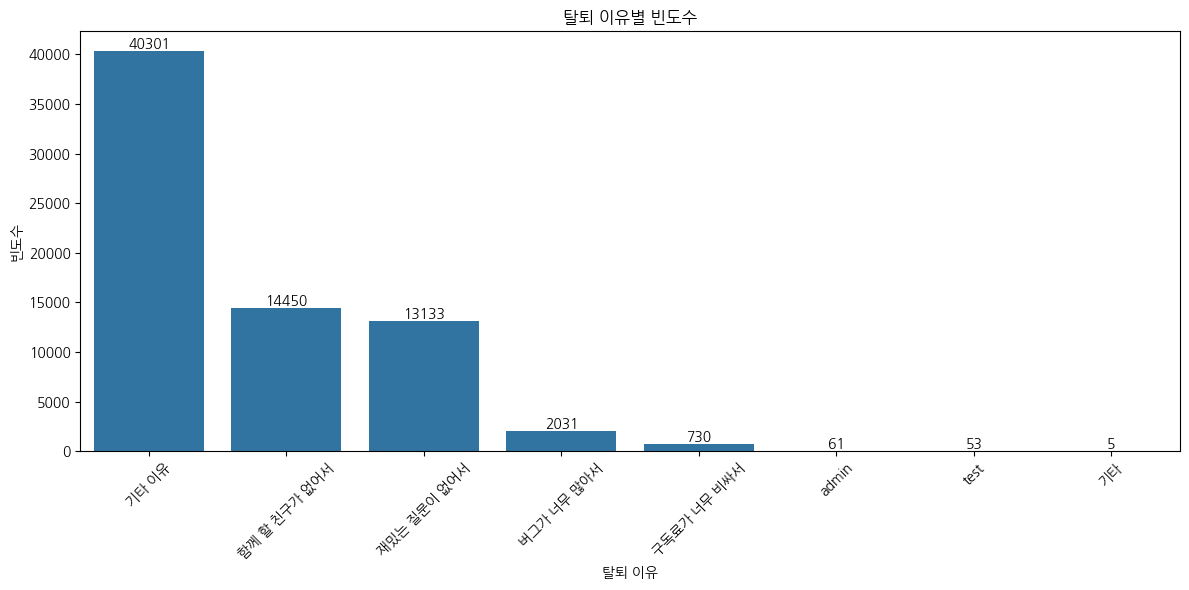

In [50]:
# 탈퇴 이유에 대해서 유니크한 값은?
print(f"유니크한 탈퇴 이유 개수: {df_dict['accounts_userwithdraw'].reason.nunique()}")

# 탈퇴 이유의 분포 확인
plt.figure(figsize=(12, 6))
sns.countplot(data=df_dict["accounts_userwithdraw"], x='reason', order=df_dict["accounts_userwithdraw"].reason.value_counts().index)
plt.title("탈퇴 이유별 빈도수")
plt.xlabel("탈퇴 이유")
plt.ylabel("빈도수")
for index, value in enumerate(df_dict["accounts_userwithdraw"].reason.value_counts()):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [54]:
# 중복 데이터가 존재하므로 확인
display(df_dict["accounts_userwithdraw"][df_dict["accounts_userwithdraw"].drop(columns=['id']).duplicated()])

# admin 이유로 탈퇴한 경우 확인
display(df_dict["accounts_userwithdraw"][df_dict["accounts_userwithdraw"].reason == "admin"])

,id,reason,created_at
430,477,기타 이유,2023-04-22 23:37:14
1990,2061,기타 이유,2023-04-30 10:42:13
2143,2216,기타 이유,2023-04-30 13:46:47
2527,2600,기타 이유,2023-05-01 08:42:30
3478,3553,기타 이유,2023-05-03 08:36:43
...,...,...,...
53596,53723,버그가 너무 많아서,2023-06-16 10:45:40
55337,55464,기타 이유,2023-06-22 12:34:30
58944,59074,기타 이유,2023-07-12 11:55:09
65623,65753,재밌는 질문이 없어서,2023-09-22 09:37:40


,id,reason,created_at
47248,47374,admin,2023-05-28 15:07:43
47250,47376,admin,2023-05-29 06:22:53
47251,47377,admin,2023-05-29 06:43:36
47253,47379,admin,2023-05-29 08:33:47
47254,47380,admin,2023-05-29 09:15:01
...,...,...,...
70039,70169,admin,2024-02-17 05:09:54
70413,70543,admin,2024-03-27 03:52:44
70414,70544,admin,2024-03-27 03:52:57
70547,70677,admin,2024-04-20 15:23:56


### 기타 아이디어 및 내용 정리
---
- 서비스 종료 시점에 admin이 탈퇴한건가?
    - 딱히 그런건 아닌듯 
- id가 user_id 인가?
- 유저의 마지막 접속 기록 및 얼마나 오래 서비스를 이용했나 패턴 등 파악
- 근데 구독료가 존재하는건가??

## accounts_paymenthistory
---
---
### 공통 확인 부분

In [57]:
check_data_info(df_dict["accounts_paymenthistory"])

데이터 타입 확인
결측치가 없습니다.
id 컬럼 제외한 중복값 확인
531
비율
0.558
전체 중복값이 없습니다.
데이터프레임 크기 확인
(95140, 5)
메모리 사용량
13.45 MB
기본 통계량
                  id  productId phone_type                     created_at  \
count   95140.000000      95140      95140                          95140   
unique           NaN          4          2                            NaN   
top              NaN  heart.777          I                            NaN   
freq             NaN      57873      61632                            NaN   
mean    49136.797572        NaN        NaN  2023-05-27 21:47:32.003741952   
min         6.000000        NaN        NaN            2023-05-13 21:28:34   
25%     24531.750000        NaN        NaN  2023-05-16 11:48:44.750000128   
50%     49176.500000        NaN        NaN     2023-05-21 12:40:45.500000   
75%     73740.250000        NaN        NaN  2023-05-27 13:02:52.249999872   
max     98078.000000        NaN        NaN            2024-05-08 14:12:45   
std     28366.854064        NaN        N

,id,productId,phone_type,created_at,user_id
0,6,heart.777,A,2023-05-13 21:28:34,1211127
1,7,heart.777,A,2023-05-13 21:29:39,1151343
2,8,heart.777,A,2023-05-13 21:31:33,1002147
3,9,heart.777,A,2023-05-13 21:31:39,1095040
4,11,heart.777,A,2023-05-13 21:34:32,1164081


{'dtypes': id                     int64
 productId             object
 phone_type            object
 created_at    datetime64[ns]
 user_id                int64
 dtype: object,
 'null_count': id            0
 productId     0
 phone_type    0
 created_at    0
 user_id       0
 dtype: int64,
 'null_rate': id            0.0
 productId     0.0
 phone_type    0.0
 created_at    0.0
 user_id       0.0
 dtype: float64,
 'duplicate_excl_id': {'count': np.int64(531), 'rate': np.float64(0.558)},
 'duplicate_all': {'count': np.int64(0), 'rate': np.float64(0.0)},
 'shape': (95140, 5),
 'memory_MB': np.float64(13.44899845123291),
 'describe':                   id  productId phone_type                     created_at  \
 count   95140.000000      95140      95140                          95140   
 unique           NaN          4          2                            NaN   
 top              NaN  heart.777          I                            NaN   
 freq             NaN      57873      61632         

### EDA
---

,id,productId,phone_type,created_at,user_id
30913,31939,heart.200,I,2023-05-17 13:46:11,1293409
35059,36214,heart.1000,I,2023-05-18 13:45:36,979577
90094,93000,heart.1000,I,2023-07-11 05:04:19,1556526
90149,93057,heart.200,A,2023-07-11 09:23:23,1193817
90228,93136,heart.1000,I,2023-07-11 12:34:23,1352448
...,...,...,...,...,...
95128,98067,heart.777,I,2024-05-05 14:29:12,1481617
95130,98069,heart.777,I,2024-05-06 00:08:24,1107249
95132,98071,heart.777,I,2024-05-06 05:19:14,1398516
95135,98074,heart.777,I,2024-05-06 14:51:27,1086654


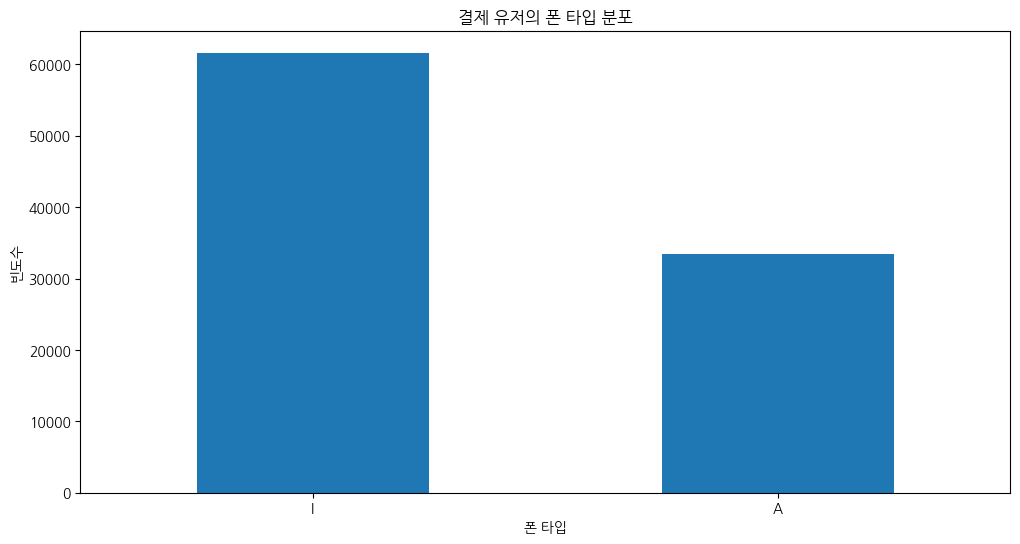

In [60]:
## 중복 데이터 확인 좀
display(df_dict["accounts_paymenthistory"][df_dict["accounts_paymenthistory"].drop(columns=['id']).duplicated()])

# 결제 유저의 phone_type 분포 확인
plt.figure(figsize=(12, 6))
df_dict["accounts_paymenthistory"].phone_type.value_counts().plot(kind='bar')
plt.title("결제 유저의 폰 타입 분포")
plt.xlabel("폰 타입")
plt.ylabel("빈도수")
plt.xticks(rotation=0)
plt.show()

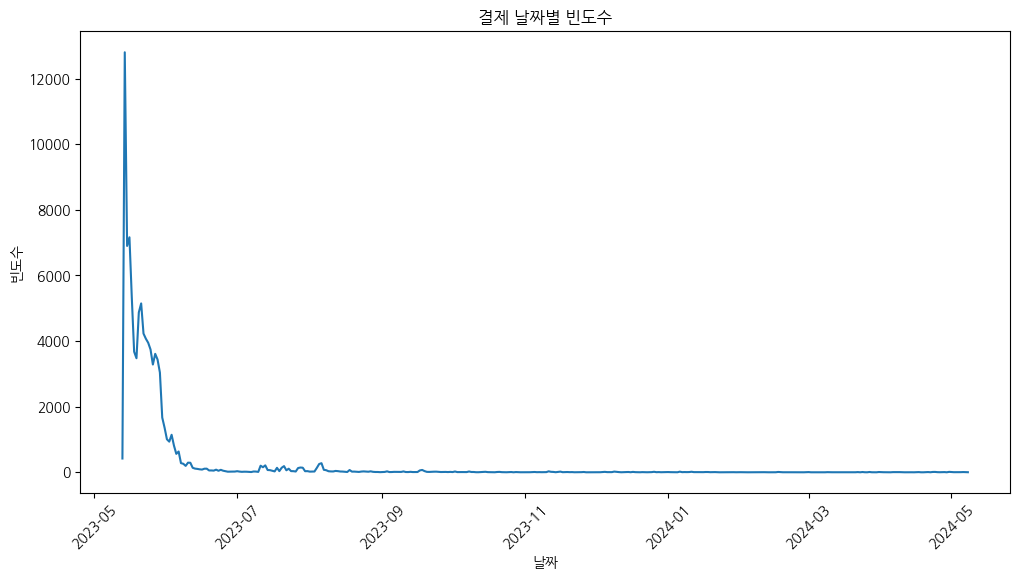

In [61]:
# 일자에 대한 결제 빈도 수 확인
df_dict["accounts_paymenthistory"].created_at.dt.date.value_counts().sort_index().plot(kind='line', figsize=(12, 6))
plt.title("결제 날짜별 빈도수")
plt.xlabel("날짜")
plt.ylabel("빈도수")
plt.xticks(rotation=45)
plt.show()


### 기타 아이디어 및 내용 정리
---
- 서비스 초반에는 많은 유저의 결제가 있었음
- 결제 실패한 것과 비교해봤을 때도 많은 경우가 23년 5월에 분포함 -> 많은 결제가 있던 5월에 결제 실패 또한 많았음
- 또한 phone type에 대해서도 결제 실패와 결제 내용이 동일한 형상을 보임
- 추가적으로 결제 테이블의 id와 결제 실패 id는 서로 무관 -> 다른 영향을 보일 테이블이 없다면 id 제거해도 괜찮을 듯함

## polls_questionset
---
---
### 공통 확인 부분

In [62]:
check_data_info(df_dict["polls_questionset"])

데이터 타입 확인
결측치가 없습니다.
id 컬럼 제외한 중복값이 없습니다.
전체 중복값이 없습니다.
데이터프레임 크기 확인
(158384, 6)
메모리 사용량
37.53 MB
기본 통계량
                  id                             question_piece_id_list  \
count   1.583840e+05                                             158384   
unique           NaN                                             158384   
top              NaN  [208350161, 208350162, 208350163, 208350164, 2...   
freq             NaN                                                  1   
mean    7.641274e+06                                                NaN   
min     9.981700e+04                                                NaN   
25%     1.953393e+06                                                NaN   
50%     6.757335e+06                                                NaN   
75%     1.217510e+07                                                NaN   
max     2.083845e+07                                                NaN   
std     5.943690e+06                                                Na

,id,question_piece_id_list,opening_time,status,created_at,user_id
0,99817,"[998458, 998459, 998460, 998461, 998462, 99846...",2023-04-28 12:27:22,F,2023-04-28 12:27:23,849436
1,99830,"[998588, 998589, 998590, 998591, 998592, 99859...",2023-04-28 12:28:07,F,2023-04-28 12:28:07,849438
2,99840,"[998689, 998691, 998693, 998695, 998697, 99869...",2023-04-28 12:28:38,F,2023-04-28 12:28:38,847375
3,99841,"[998688, 998690, 998692, 998694, 998696, 99869...",2023-04-28 12:28:38,F,2023-04-28 12:28:38,849446
4,99848,"[998768, 998769, 998770, 998771, 998772, 99877...",2023-04-28 12:28:57,F,2023-04-28 12:28:57,849477


{'dtypes': id                                 int64
 question_piece_id_list            object
 opening_time              datetime64[ns]
 status                            object
 created_at                datetime64[ns]
 user_id                            int64
 dtype: object,
 'null_count': id                        0
 question_piece_id_list    0
 opening_time              0
 status                    0
 created_at                0
 user_id                   0
 dtype: int64,
 'null_rate': id                        0.0
 question_piece_id_list    0.0
 opening_time              0.0
 status                    0.0
 created_at                0.0
 user_id                   0.0
 dtype: float64,
 'duplicate_excl_id': {'count': np.int64(0), 'rate': np.float64(0.0)},
 'duplicate_all': {'count': np.int64(0), 'rate': np.float64(0.0)},
 'shape': (158384, 6),
 'memory_MB': np.float64(37.52619743347168),
 'describe':                   id                             question_piece_id_list  \
 count   

평균 set 당 질문 개수: 101.44


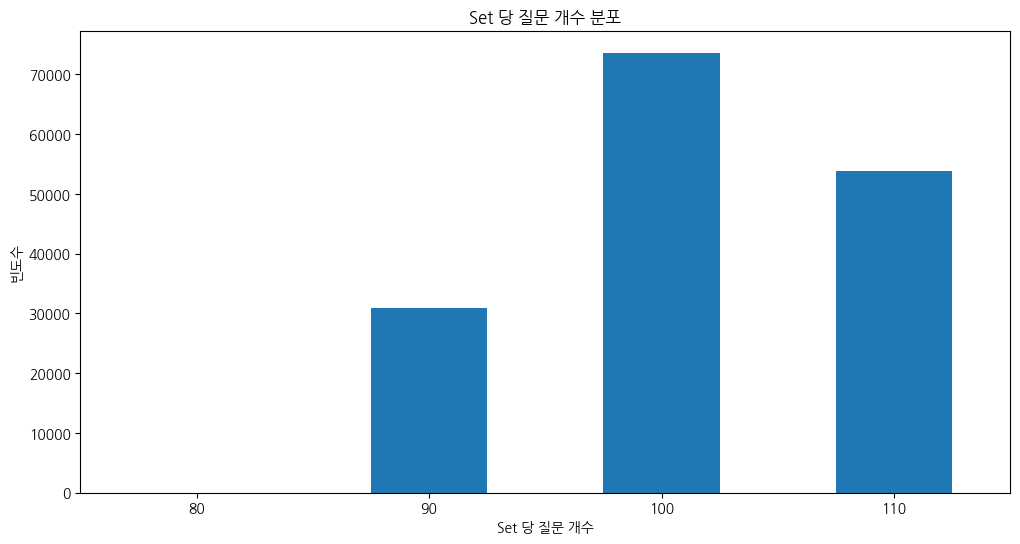

,id,question_piece_id_list,opening_time,status,created_at,user_id
30,99973,"[1000018, 1000019, 1000020, 1000021, 1000022, ...",2023-04-28 12:33:34,F,2023-04-28 12:33:34,849559
31,99974,"[1000028, 1000029, 1000030, 1000031, 1000032, ...",2023-04-28 12:33:35,F,2023-04-28 12:33:36,849864
32,99977,"[1000058, 1000059, 1000060, 1000061, 1000062, ...",2023-04-28 13:23:37,F,2023-04-28 12:33:37,849634
33,99978,"[1000068, 1000069, 1000070, 1000071, 1000072, ...",2023-04-28 12:33:38,F,2023-04-28 12:33:38,849466
34,99983,"[1000118, 1000119, 1000120, 1000121, 1000122, ...",2023-04-28 13:23:42,F,2023-04-28 12:33:42,849439
...,...,...,...,...,...,...
30954,999390,"[9994184, 9994187, 9994189, 9994191, 9994192, ...",2023-05-07 15:38:40,F,2023-05-07 14:48:41,908294
30955,999431,"[9994594, 9994596, 9994598, 9994600, 9994602, ...",2023-05-07 15:38:47,F,2023-05-07 14:48:47,883630
30956,999685,"[9997138, 9997139, 9997140, 9997141, 9997142, ...",2023-05-07 15:39:23,F,2023-05-07 14:49:23,925036
30957,999691,"[9997194, 9997195, 9997197, 9997199, 9997201, ...",2023-05-07 15:39:24,F,2023-05-07 14:49:24,880525


In [65]:
# 평균 set 당 질문 개수 확인
avg_questions_per_set = df_dict["polls_questionset"].question_piece_id_list.apply(lambda x: len(x)).mean()
print(f"평균 set 당 질문 개수: {avg_questions_per_set:.2f}")

# set 당 질문 개수 분포 확인
plt.figure(figsize=(12, 6))
df_dict["polls_questionset"].question_piece_id_list.apply(lambda x: len(x)).value_counts().sort_index().plot(kind='bar')
plt.title("Set 당 질문 개수 분포")
plt.xlabel("Set 당 질문 개수")
plt.ylabel("빈도수")
plt.xticks(rotation=0)
plt.show()

# set 당 질문 개수가 90개인 경우 확인
display(df_dict["polls_questionset"][df_dict["polls_questionset"].question_piece_id_list.apply(lambda x: len(x)) == 90])

In [66]:
## opening_time이 created_at보다 빠른 경우 확인
display(df_dict["polls_questionset"][df_dict["polls_questionset"].opening_time < df_dict["polls_questionset"].created_at])

# 반대로 created_at이 opening_time보다 빠른 경우 중 가장 크게 차이 나는 경우
display(df_dict["polls_questionset"][df_dict["polls_questionset"].created_at < df_dict["polls_questionset"].opening_time].sort_values(by='created_at', ascending=False).head(10))

# 그 중 가장 크게 차이나는 값은?
print(f"가장 크게 차이나는 값: {df_dict['polls_questionset'][df_dict['polls_questionset'].created_at < df_dict['polls_questionset'].opening_time].sort_values(by='created_at', ascending=False).head(1)}")

,id,question_piece_id_list,opening_time,status,created_at,user_id
0,99817,"[998458, 998459, 998460, 998461, 998462, 99846...",2023-04-28 12:27:22,F,2023-04-28 12:27:23,849436
22,99916,"[999448, 999449, 999450, 999451, 999452, 99945...",2023-04-28 12:31:51,F,2023-04-28 12:31:52,849692
31,99974,"[1000028, 1000029, 1000030, 1000031, 1000032, ...",2023-04-28 12:33:35,F,2023-04-28 12:33:36,849864
63,100426,"[1004548, 1004549, 1004550, 1004551, 1004552, ...",2023-04-28 12:48:57,F,2023-04-28 12:48:58,849620
79,100637,"[1006658, 1006659, 1006660, 1006661, 1006662, ...",2023-04-28 12:58:39,F,2023-04-28 12:58:40,849938
...,...,...,...,...,...,...
143350,16798833,"[167989091, 167989092, 167989093, 167989094, 1...",2023-05-29 14:32:57,F,2023-05-29 14:32:58,1547256
144351,17024477,"[170245531, 170245532, 170245533, 170245534, 1...",2023-05-30 06:02:01,F,2023-05-30 06:02:02,1550358
145183,17208810,"[172088858, 172088861, 172088863, 172088864, 1...",2023-05-30 13:17:42,F,2023-05-30 13:17:43,1553161
156012,20052297,"[200523731, 200523732, 200523733, 200523734, 2...",2023-06-17 11:35:32,F,2023-06-17 11:35:33,1576277


,id,question_piece_id_list,opening_time,status,created_at,user_id
158383,20838446,"[208385221, 208385222, 208385223, 208385224, 2...",2024-05-07 12:12:30,C,2024-05-07 11:32:30,945560
158382,20838445,"[208385211, 208385212, 208385213, 208385214, 2...",2024-05-07 12:09:08,C,2024-05-07 11:29:08,1001607
158381,20838419,"[208384951, 208384952, 208384953, 208384954, 2...",2024-05-07 00:55:00,C,2024-05-07 00:15:00,1208878
158380,20838344,"[208384201, 208384202, 208384203, 208384204, 2...",2024-05-06 11:38:20,C,2024-05-06 10:58:20,876072
158379,20838253,"[208383291, 208383292, 208383293, 208383294, 2...",2024-05-05 14:46:27,C,2024-05-05 14:06:27,1251933
158378,20838047,"[208381231, 208381232, 208381233, 208381234, 2...",2024-05-03 18:03:50,C,2024-05-03 17:23:50,1497413
158377,20836982,"[208370581, 208370582, 208370583, 208370584, 2...",2024-04-22 16:19:12,C,2024-04-22 15:39:12,1351499
158376,20836830,"[208369061, 208369062, 208369063, 208369064, 2...",2024-04-20 05:33:17,C,2024-04-20 04:53:17,1252462
158375,20836712,"[208367881, 208367882, 208367883, 208367884, 2...",2024-04-18 03:03:30,O,2024-04-18 02:23:30,1087583
158374,20836576,"[208366521, 208366522, 208366523, 208366524, 2...",2024-04-14 12:07:51,O,2024-04-14 11:27:51,1275126


가장 크게 차이나는 값:               id                             question_piece_id_list  \
158383  20838446  [208385221, 208385222, 208385223, 208385224, 2...   

              opening_time status          created_at  user_id  
158383 2024-05-07 12:12:30      C 2024-05-07 11:32:30   945560  


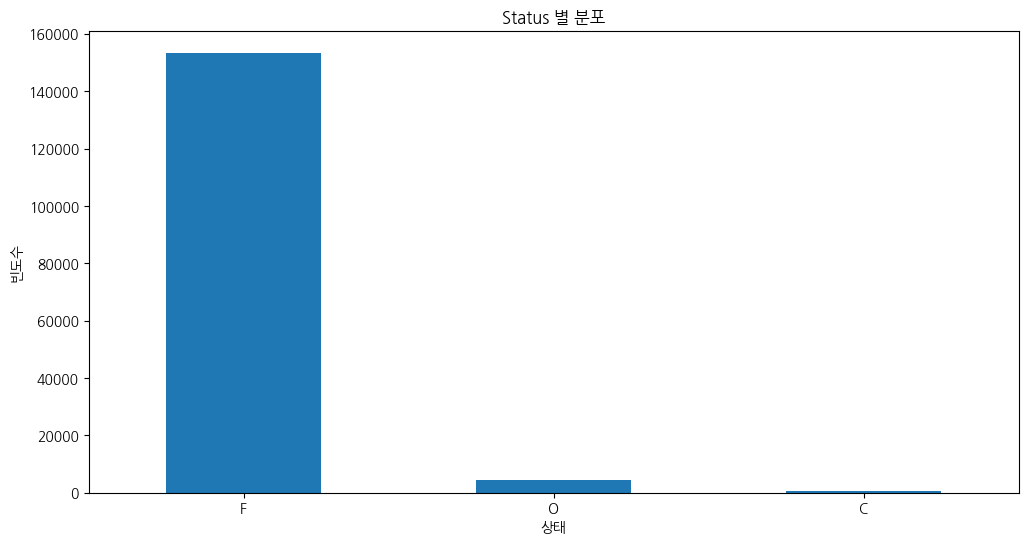

In [68]:
## status에 따른 분포 확인
df_dict["polls_questionset"].status.value_counts().plot(kind='bar', figsize=(12, 6))
plt.title("Status 별 분포")
plt.xlabel("상태")
plt.ylabel("빈도수")
plt.xticks(rotation=0)
plt.show()


### 기타 아이디어 및 내용 정리
---
- 언제 open 했는지는 나와있지만 close 시점에 대해서는 알 수 없나?
- 해당 설문을 진행한 유저는 얼마나 되는지
    - 설문에 소요되는 평균 시간은 얼마나 되는지 알 수 없을까?
- opening_time이 created_at보다 빠른 경우도 식별됨
    - 해당 경우는 시스템의 오류로 판단되어(생성이 질문 열린 시간보다 빠를 수 없음) 해당 경우 opening_time = created_at에 맞추도록 변경 예정
- 마찬가지로 qustion_id 컬럼으로 변경 예정
    - set로 구성된 question의 question_id인지 아니면 polls_question의 question_id인지

## polls_questionpiece
---
---
### 공통 확인 부분

In [67]:
check_data_info(df_dict["polls_questionpiece"])

데이터 타입 확인
결측치가 없습니다.
id 컬럼 제외한 중복값 확인
572
비율
0.045
전체 중복값이 없습니다.
데이터프레임 크기 확인
(1265476, 5)
메모리 사용량
48.27 MB
기본 통계량
                 id      is_voted                     created_at  \
count  1.265476e+06  1.265476e+06                        1265476   
mean   7.658001e+07  9.630266e-01  2023-05-17 13:39:58.427317504   
min    9.984580e+05  0.000000e+00            2023-04-28 12:27:22   
25%    2.029260e+07  1.000000e+00            2023-05-09 21:50:54   
50%    6.846533e+07  1.000000e+00     2023-05-15 14:18:31.500000   
75%    1.212662e+08  1.000000e+00            2023-05-22 09:56:44   
max    2.083852e+08  1.000000e+00            2024-05-07 11:32:30   
std    5.912924e+07  1.886967e-01                            NaN   

        question_id    is_skipped  
count  1.265476e+06  1.265476e+06  
mean   7.133598e+02  8.905740e-04  
min    9.900000e+01  0.000000e+00  
25%    2.780000e+02  0.000000e+00  
50%    4.770000e+02  0.000000e+00  
75%    9.820000e+02  0.000000e+00  
max    5.133000e+03 

,id,is_voted,created_at,question_id,is_skipped
0,998458,1,2023-04-28 12:27:22,252,0
1,998459,1,2023-04-28 12:27:22,244,0
2,998460,1,2023-04-28 12:27:22,183,0
3,998461,1,2023-04-28 12:27:22,101,0
4,998462,1,2023-04-28 12:27:22,209,0


{'dtypes': id                      int64
 is_voted                int64
 created_at     datetime64[ns]
 question_id             int64
 is_skipped              int64
 dtype: object,
 'null_count': id             0
 is_voted       0
 created_at     0
 question_id    0
 is_skipped     0
 dtype: int64,
 'null_rate': id             0.0
 is_voted       0.0
 created_at     0.0
 question_id    0.0
 is_skipped     0.0
 dtype: float64,
 'duplicate_excl_id': {'count': np.int64(572), 'rate': np.float64(0.045)},
 'duplicate_all': {'count': np.int64(0), 'rate': np.float64(0.0)},
 'shape': (1265476, 5),
 'memory_MB': np.float64(48.27420425415039),
 'describe':                  id      is_voted                     created_at  \
 count  1.265476e+06  1.265476e+06                        1265476   
 mean   7.658001e+07  9.630266e-01  2023-05-17 13:39:58.427317504   
 min    9.984580e+05  0.000000e+00            2023-04-28 12:27:22   
 25%    2.029260e+07  1.000000e+00            2023-05-09 21:50:54   
 5

### EDA
---

In [72]:
display(df_dict["polls_question"][df_dict["polls_question"].question_id == 252])

display(df_dict["polls_questionpiece"][df_dict["polls_questionpiece"].question_id == 252])

,question_id,question_text,created_at
153,252,손이 가장 이쁘게 생겼을거 같은 사람은?,2023-04-01 11:09:27


,id,is_voted,created_at,question_id,is_skipped
0,998458,1,2023-04-28 12:27:22,252,0
354,1001617,1,2023-04-28 12:36:53,252,0
511,1005467,1,2023-04-28 12:53:19,252,0
717,1009274,1,2023-04-28 13:11:50,252,0
1165,1016913,1,2023-04-28 13:47:37,252,0
...,...,...,...,...,...
1251344,202788832,0,2023-06-25 10:45:48,252,0
1253823,203788287,1,2023-07-03 11:18:34,252,0
1255272,204396938,1,2023-07-11 09:10:32,252,0
1259451,206464191,1,2023-08-05 01:04:26,252,0


In [76]:
df_dict["polls_question"].question_text.nunique()

df_dict["polls_question"].question_text.value_counts()

df_dict['polls_question'][df_dict["polls_question"].question_text == '2세가 가장 귀여울 것 같은 사람은?']

,question_id,question_text,created_at
188,287,2세가 가장 귀여울 것 같은 사람은?,2023-04-01 11:09:35
1282,1391,2세가 가장 귀여울 것 같은 사람은?,2023-05-15 14:03:15
3051,3160,2세가 가장 귀여울 것 같은 사람은?,2023-06-02 08:07:09


---

나중에 이걸 파이프라인으로 자동화한다면?
- 데이터를 불러오는 작업(id컬럼이 있다면 제거가 필요할 듯)
- 데이터 확인
- 데이터 전처리 작업
    - 데이터 컬럼 중 id 컬럼이 존재한 경우
        - id가 다른 테이블과 연관해서 있는 경우 목록 만들어서 rename 필요
    - 데이터 결측치 또는 중복치가 일정 이상일 경우 알림
    - 데이터 결측치 또는 중복치가 일정 이상일 경우 제거
    - 데이터 컬럼 중 분할(필요에 따라)
        - 년도, 월, 날짜, 시간, 분, 초 로 분할
        - list로 저장된 컬럼이 있는 경우 분할


In [53]:
# # id 컬럼 rename 필요한 테이블
# rename_df_column_dict = {
#     df_dict['events']['id'] : df_dict['events']['event_id'],
#     df_dict['accounts_school']['id'] : df_dict['accounts_school']['school_id'],
#     df_dict['polls_question']['id'] : df_dict['polls_question']['question_id'],
#     df_dict['accounts_group']['id'] : df_dict["accounts_group"]['group_id']
# }
